<a href="https://colab.research.google.com/github/abhishekkumawat23/neural-backpropagation-from-scratch/blob/main/backpropagation_and_neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note:** This is just a draft version and is not well formatted.

# Building Backpropagation and Neural Networks from Scratch

## What This Notebook Is About

This notebook has two main goals:

1. **Implement backpropagation from scratch:** Build an automatic differentiation system that computes gradients automatically—the core mechanism behind all modern deep learning frameworks.

2. **Implement a Multi-Layer Perceptron (MLP) from scratch:** Build the fundamental components of neural networks (neurons, layers, and complete networks) and understand how they connect together.

Together, these two systems form a complete deep learning framework. At the end, we'll verify everything works by training our MLP on a simple prediction task.

## What We'll Build

**Automatic Differentiation System:**
- `Scalar` class that tracks operations and stores gradients
- Forward pass: Record all operations in a computation graph
- Backward pass: Automatically compute gradients using the chain rule
- Support for basic operations (addition, multiplication) and activation functions (ReLU)

**Neural Network Components:**
- `Neuron`: Single computational unit with weights and bias
- `Layer`: Collection of neurons that process inputs in parallel
- `MLP`: Multi-layer network that stacks layers together
- Parameter management and gradient handling

**Integration:**
- Connect backpropagation with neural networks
- Implement training loops: forward → loss → backward → update
- Demonstrate the complete system on a working example

By the end, you'll understand exactly how automatic differentiation works and how to build neural networks from first principles.

---

# Deep Neural Networks

## Neuron

Before jumping into backpropagation, let's cover the fundamentals. At the most atomic level, a neural network contains neurons. A neuron has **k weight parameters** and **one bias parameter**. During training, each neuron receives k input values, computes a weighted sum using its weight parameters, adds the bias, and outputs a single value.

- **Weight parameters** are the values multiplied with the input values.
- **Bias parameter** allows the neuron to output a non-zero value even when all inputs are zero. It acts as a threshold adjuster.
- **Output value** represents how activated this neuron is for the given input.

A neuron **learns to detect** a single **feature** or pattern in the data. For example, in an image classifier, one neuron might learn to detect edges, another might detect curves, and another might detect specific textures.

---

## Neural Layer

A neural layer consists of multiple neurons that all receive the same input values of size k. These neurons don't communicate with each other. Although they receive identical inputs, each neuron has its own weight and bias parameters, so their outputs differ.

Since the output value represents how activated a neuron is for a given input, we can observe which neurons are more activated, less activated, or deactivated for that specific input by examining the layer's output values. Because the output depends on the input, different input patterns will cause different neurons in the layer to be strongly activated, weakly activated, or deactivated.

---

## Neural Network

Connect two neural layers so that each neuron of Layer 1 connects to each neuron of Layer 2, and you have a **fully connected 2-layer neural network**.

```
Input(k) → Layer 1(n1) → Layer 2(n2) → Output(o)
```

If we have an input of size k, then each input value goes to every neuron in Layer 1. Since each neuron receives k inputs, it needs k weight parameters (one weight per input).

**Question:** How many parameters does Layer 1 have?

**Answer:** `n1_neurons × (k_weight_parameters + 1_bias) = n1(k + 1)`

Now, since each neuron in Layer 1 is connected to each neuron in Layer 2, the outputs from Layer 1 become the inputs to Layer 2. As each neuron in Layer 2 receives n1 input values, it needs n1 weight parameters.

**Question:** How many parameters does Layer 2 have?

**Answer:** `n2_neurons × (n1_weight_parameters + 1_bias) = n2(n1 + 1)`

**Question:** What is the output size?

**Answer:** Since the output is what Layer 2 returns, and each neuron outputs one value, the output size is n2.

**Question:** How many total parameters are in the neural network?

**Answer:** `layer1_count + layer2_count = n1(k + 1) + n2(n1 + 1)`

All these parameters combined are called **model parameters**.

---

## Types of Neural Network Architectures

The 2-layer fully connected network we described above is just one type of neural network architecture. Different architectures are designed to excel at different types of tasks. Let's explore the most common ones.

**Note:** Don't worry if these definitions seem unclear at first—it's perfectly fine! In this notebook, we'll focus on the simplest neural network: the Multi-Layer Perceptron (MLP). We'll explain MLPs in detail as we progress. The other architectures will be covered thoroughly in separate notebooks.

### Multi-Layer Perceptron (MLP)

An **MLP** is a fully connected feedforward neural network with multiple layers. "Feedforward" means information flows in one direction only—from input through hidden layers to output, with no loops or cycles.

**Structure:**
```
Input → Hidden Layer 1 → Hidden Layer 2 → ... → Output
```

Every neuron in one layer connects to every neuron in the next layer (fully connected).

**When to use:**
- Tabular data (spreadsheets, databases)
- Simple classification or regression tasks
- When data doesn't have spatial or temporal patterns

**Example:** Predicting house prices based on features like square footage, number of bedrooms, and location.

---

### Convolutional Neural Network (CNN)

A **CNN** uses specialized layers that look at small regions of input at a time, making them excellent for processing grid-like data such as images. Instead of connecting every input to every neuron, CNNs use **local connections** and **shared weights** (the same pattern detector is applied across the entire input).

**Structure:**
```
Input Image → Convolutional Layers → Pooling Layers → Fully Connected Layers → Output
```

**When to use:**
- Image classification, object detection
- Video processing
- Any data with spatial structure (2D or 3D grids)

**Example:** Identifying whether an image contains a cat or a dog. Early layers detect edges, middle layers detect patterns like eyes or fur, and later layers recognize the complete animal.

**Why better than MLP for images:** A 28×28 pixel image has 784 input values. An MLP would need thousands of parameters per neuron in the first layer. CNNs detect local patterns (like edges) and reuse them across the image, requiring far fewer parameters while achieving better performance.

---

### Recurrent Neural Network (RNN)

An **RNN** processes sequential data by maintaining a hidden state that gets updated at each step. Unlike feedforward networks, RNNs have **recurrent connections**—the network's output loops back as input for the next time step, giving the network memory of previous inputs.

**Structure:**
```
Input₁ → RNN → Output₁
          ↓ (hidden state)
Input₂ → RNN → Output₂
          ↓ (hidden state)
Input₃ → RNN → Output₃
```

The hidden state from time t-1 influences the output at time t. This **recurrence** (the state keeps coming back) is why it's called "recurrent."

**When to use:**
- Text and language processing (next word prediction, translation)
- Time series data (stock prices, weather forecasting)
- Speech recognition
- Any sequential data where order matters

**Example:** Predicting the next word in a sentence. When processing "What is your", the RNN remembers the context and can predict "name" as the likely next word.

**Modern variants:** LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) are improved versions that better handle long sequences.

---

### Transformer

A **Transformer** uses an **attention mechanism** to process all parts of the input simultaneously, rather than sequentially like RNNs. Attention allows the network to focus on relevant parts of the input when producing each part of the output, regardless of their position.

**Structure:**
```
Input → Self-Attention Layers → Feedforward Layers → Output
```

The attention mechanism computes relationships between all input positions in parallel.

**When to use:**
- Natural language processing (translation, text generation)
- Large language models (GPT, BERT, Claude)
- Any task requiring understanding of long-range dependencies
- Increasingly used for images (Vision Transformers) and other domains

**Example:** Translating "The cat sat on the mat" to French. The attention mechanism helps the model understand that "sat" relates to "cat" (the subject) and "mat" (the location), even though they're separated by other words.

**Why revolutionary:** Transformers can process entire sequences in parallel (unlike RNNs which process one step at a time), making them much faster to train. They also handle long-range dependencies better than RNNs, enabling models to understand context across entire documents.

---

### Choosing the Right Architecture

| Architecture | Best For | Key Characteristic |
|-------------|----------|-------------------|
| **MLP** | Tabular data, simple tasks | Fully connected, feedforward |
| **CNN** | Images, spatial data | Local connections, shared weights |
| **RNN** | Sequences, text, time series | Recurrent connections, memory |
| **Transformer** | Language, long sequences | Attention mechanism, parallelizable |

**Note:** Modern deep learning often combines these architectures. For example, an image captioning system might use a CNN to process the image and a Transformer to generate the descriptive text.

---

## Training - What Does It Mean?

During training, we pass many input values (one at a time) to the neural network. For each input value (also called a **training step**), each neuron in the first layer computes its output. The second layer receives the first layer's outputs as its inputs and computes its own outputs. This process continues through all layers until we get the final output.

For example, we pass the numeric representation of the word "Hello," and as output we get the numeric representation of "sdnsdbj." Let's say we wanted the neural network to output "World" instead of "sdnsdbj." We don't just want correct output for this single input—we want the neural network to produce meaningful outputs for many inputs, such as Hello → World, My → Name, etc.

### How Do We Achieve This?

Neural networks can't simply predict what we want without training. So how do we train them?

For our "Hello" example, the neural network outputted "sdnsdbj," but we wanted "World." If we can:
- **Find a way to measure how far the neural network's prediction is from what we want**
- **Have a mechanism to nudge/update the model parameters so that next time the prediction is a little closer to our desired output**

If we can do both of these for the neural network for a large set of inputs, we'll end up with a system whose model parameters have been updated (learned) to produce outputs very close to what we want. **This is called training.**

---

## How Close Are the Prediction and Target?

The **prediction** is what the neural network outputs, and the **target** is what we want. Between the words "World" and "sdnsdbj," there's no intuitive way to measure how close they are directly.

Let's use numeric predictions for intuition. Suppose the network predicted 5 and we wanted 67. The prediction is 62 units away from the target. In another example, the prediction is 34 and the target is 38—here the prediction is only 4 units away from the target. We can say the network did a better job in the latter case.

**For words, the situation is more nuanced.** Neural networks ultimately work with numbers, not text. Both the prediction and target must be represented numerically. There are sophisticated methods to convert words into numeric representations (called **embeddings**) that capture meaning—for example, the words "cat" and "dog" would have similar numeric representations, while "cat" and "car" would be different. Once words are represented numerically, we can measure similarity using mathematical distance metrics.

We'll explore how these word representations work in a later section. For now, the key principle is: **we need a way to measure how far our prediction is from the target**, whether dealing with numbers, words, or other types of data.

This distance between the prediction and target is called **loss**.

---

## Mechanism to Update Model Parameters

Once we **have a loss value**—a number indicating how far the prediction is from the target—we can update the model parameters in a way that reduces the loss. This step is formally called **optimization**.

From input through neural layers to output, we performed simple mathematical computations. Crucially, all these computations are **differentiable** (we can compute their derivatives). This property is essential for what comes next.

### Gradient Descent

For each model parameter (let's call it `param_i`), if we can compute its **gradient**—that is, `dloss/dparam_i` (how much the loss changes when `param_i` changes)—then we can update the parameter by a small amount:

```
param_i = param_i - learning_rate × (dloss/dparam_i)
```

Here, `learning_rate` (e.g., 0.001) is a small positive number. By subtracting the gradient multiplied by this small value, we nudge the parameter in a direction that reduces the loss.

**Intuition:**
- If `dloss/dparam_i` is positive → increasing `param_i` increases loss → so we *decrease* `param_i`
- If `dloss/dparam_i` is negative → increasing `param_i` decreases loss → so we *increase* `param_i` (subtracting a negative = adding)

### Backpropagation: Computing Gradients

At each training step, we follow this sequence:

1. **Forward pass:** Input → Layer 1 → Layer 2 → ... → Output → Loss computation
2. **Backward pass:** Compute gradients of all parameters by going backwards through the network

**Starting the backward pass:**

We begin with the loss itself. By definition:
```
dloss/dloss = 1.0
```

Now we work backwards through the network. Consider the last layer (Layer 2) that produced the output. The loss was computed from this layer's output and the target.

For example, if our loss function to calculate the distance between prediction and target is:
```
loss = (output - target)²
```

Then we can compute:
```
dloss/doutput = 2 × (output - target)
```

From here, we continue propagating gradients backwards through Layer 2 to its parameters (weights and biases), then to Layer 1's outputs, then to Layer 1's parameters, and so on.

This backward propagation of gradients—using the **chain rule** from calculus—is called **backpropagation**. It allows us to efficiently compute `dloss/dparam_i` for every parameter in the network, no matter how many layers deep it is.

**Key insight:** Because each computation in the forward pass is differentiable, we can trace back how changes in any parameter affect the final loss, enabling us to update all parameters to improve the model's predictions.

### Sounds Complex?

It is! ** One of the goal of this notebook is to implement backpropagation from scratch**, so you'll understand exactly how these gradients flow backwards through the network. But before diving into the implementation, let's complete our foundational understanding of the core concepts.

---

## The Need for Non-Linearity

*Note: Just to refresh, a function is called linear when it follows additivity (f(x+y) = f(x) + f(y)) and homogeneity (f(cx) = c·f(x)).*

So far, we've seen that each neuron performs a weighted sum of inputs plus bias, which is a linear function. If we stack multiple layers, we're just combining linear functions, which results in another linear function—**this is a major problem**.

A purely linear neural network cannot learn complex patterns. Forget about learning semantic meaning in words or patterns in images; it can't even learn to predict values of a simple quadratic function, no matter how large the network is, how many parameters it has, or how much training it receives—because it's fundamentally linear at its core.

**We need to add non-linearity to enable neural networks to learn complex patterns.** This is achieved through various mechanisms, which we'll explore in the following sections.

---

## Activation Functions

To make neural networks capable of learning complex patterns, we introduce **activation functions**—non-linear transformations applied to each neuron's output.

Instead of a neuron simply outputting its weighted sum plus bias, it applies a non-linear function to this value:

```
neuron_output = activation_function(weighted_sum + bias)
```

This non-linear function is called an **activation function**, as its output represents how activated that neuron is for the given input.

### Three Core Concepts

1. **Activation level:** The output indicates how activated the neuron is for the given input.

2. **Non-linearity:** The non-linear nature enables the neural network to learn complex patterns. Note: Learning simply means updating the model parameters so the network can predict outputs while accounting for complex patterns.

3. **Gradient properties:** Not only is the activation important, but also the gradient (derivative). If an activation function's derivative is nearly zero (a flat horizontal line) for most input values, it's a poor choice—especially for deep neural networks. This is because gradients are accumulated through multiplication across layers during backpropagation. Multiplying near-zero gradients causes gradients to vanish in earlier layers. Since gradients enable parameters to learn, vanishing gradients mean parameters can no longer learn, defeating the purpose of neural networks.

---

## Common Activation Functions

### 1. Tanh (Hyperbolic Tangent)

**Formulas:**
- **Formula 1:** `tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))`
- **Formula 2:** `tanh(x) = (1 - e^(-2x)) / (1 + e^(-2x))`  
  *Note: This formula is numerically stable for positive x (e^(-2x) stays small), but for large negative x values, e^(-2x) can overflow. For production code, use library implementations (like numpy.tanh) or a sign-based approach that handles both cases safely.*
- **Formula 3:** `tanh(x) = sinh(x) / cosh(x)`

**Bounds:** (-1, 1)

**Behavior:**
- Most activity occurs for |x| < 2, where values change from approximately -1 to +1
- For |x| > 3, the function is nearly saturated—even for very large x values, tanh(x) changes very little
- In other words, the derivative (gradient) is near zero in the saturation zone where |x| > 3

**Problem for deep networks:**

This saturation is a significant issue in deep neural networks (though less problematic for shallow networks). During backpropagation, gradients flow from the loss to the output layer, then through layer_n down to layer_1. The chain rule requires multiplying gradients at each layer. When gradients are near zero (which happens for |x| > 3), these multiplications make gradients even smaller, eventually causing them to vanish.

**Why this matters:** If gradients are zero, parameters cannot learn—which defeats our main goal. The network can get stuck in saturation zones where gradients move very slowly with each training iteration.

---

### 2. Sigmoid

**Formula:** `sigmoid(x) = 1 / (1 + e^(-x))`

**Bounds:** (0, 1)

**Behavior:**
- Most activity occurs for |x| < 5
- For |x| > 6, the function is nearly saturated—very close to 0 for negative x and very close to 1 for positive x
- Faces the same vanishing gradient problems as tanh in deep neural networks

---

### 3. ReLU (Rectified Linear Unit)

**Formula:** `ReLU(x) = max(0, x)`

**Bounds:** [0, ∞)

**Behavior:**
- ReLU deactivates the neuron (outputs 0) when the computed value is ≤ 0
- Common choice for most neural networks, including many LLMs

**Why it works well:**
- Gradient is 1 for x > 0 and 0 for x < 0 (undefined at exactly x = 0, but this is handled in practice)
- For positive inputs, gradient = 1 prevents vanishing gradient problems (no multiplication by values < 1)
- For negative inputs, neuron is deactivated without saturation issues
- Simple and computationally efficient

**When tanh makes sense over ReLU:** Tanh is useful when you need zero-centered outputs from neurons (outputs that can be both positive and negative).

---

### 4. GELU (Gaussian Error Linear Unit)

**Formula:** `GELU(x) = x × Φ(x)`  
where Φ(x) is the Cumulative Distribution Function (CDF) of the standard normal distribution.

**Understanding the CDF:**
- The standard normal distribution is visualized as the familiar bell curve (the PDF - Probability Density Function)
- The CDF (Cumulative Distribution Function) represents the area under this bell curve from -∞ to x
- For any given x, Φ(x) tells us "what proportion of the distribution is ≤ x"
- GELU multiplies x by this probability to create a smooth, probabilistic gating mechanism
- To understand GELU better, it's helpful to visualize it—the function is very similar to ReLU with several improvements

**Bounds:** Approximately [-0.17, ∞)  
(The minimum value is ≈ -0.17 for small negative inputs; unbounded for positive values)

**Characteristics:**
- GELU is a smooth, probabilistic version of ReLU that gates inputs based on how likely they are to be "large" under a Gaussian (normal) distribution
- Similar to ReLU, positive x values pass through the activation
- Unlike ReLU, it doesn't arbitrarily cut off negative values—there's a smooth transition at x = 0
- For small negative values, neurons aren't fully disabled (minimum output ≈ -0.17)
- No sharp corners (differentiable everywhere)

**Popularity:** GELU is increasingly popular in modern architectures. GPT, BERT, and most modern transformers use GELU. In current state-of-the-art models, GELU is often preferred over ReLU.

---

### 5. SiLU (Sigmoid Linear Unit) / Swish

**Formula:** `SiLU(x) = x × sigmoid(x)`

**Bounds:** Approximately [-0.28, ∞)

**Characteristics:**
- Smooth, self-gated activation function
- Similar performance to GELU
- Graph is very similar to GELU, with smoothness at x = 0 compared to ReLU's sharp corner
- Also allows small negative values (minimum ≈ -0.28)

**Usage:** In modern architectures, either GELU or SiLU can be used effectively. ReLU remains a very popular choice as well due to its simplicity and computational efficiency.

In [ ]:
# Common imports
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [ ]:
# Let's define some activation functions
from scipy.special import erf

def relu(x):
  # Rectified Linear Unit
  return np.maximum(0, x) # Using np.maxium instead of max it works even when n is numpy array, normal python list or float.

def tanh(x):
  # Don't use (e**x - e**-x) / (e**x + e**-x) to avoid float overflow
  # Use formula: tanhx = (1-e**-2x) / (1+e**-2x).
  # Cautious about:
  #   1. Use absolute of x to guarantee exp_neg_2x doesn't overflow.
  #   2. Don't forget to multiply the sign of original x. We can do this because tanh(-x) = -tanh(x)
  abs_x = np.abs(x)
  exp_neg_2x = np.exp(-2*abs_x)
  return np.sign(x) * (1 - exp_neg_2x) / (1+exp_neg_2x)

def sigmoid(x):
  # Formula: 1 / (1 + e**-x)
  # Cautious about:
  #   1. Use absolute of x to avoid overflow.
  #   2. Don't forget the sign. sigmoid(-x) = e**-x * sigmoid(x)
  abs_x = np.abs(x)
  exp_neg_x = np.exp(-abs_x)
  sigmoid = 1 / (1 + exp_neg_x)
  # For numpy array we can't do `sigmoid if x > 0 else exp_neg_x * sigmoid` as x > 0 gives array but python expects true or false. So use np.where.
  return np.where(x > 0, sigmoid, exp_neg_x * sigmoid)

def pdf(x):
  # pdf: probability density function
  # This is the standard distribution function
  # Defines y values in a way that mean is zero, and standard deviation is 1.
  # Formula: pdf(x) = (1/sqrt(2pi)) * e^(-x^2/2)
  return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)

def cdf(x):
  # cdf is cumulative distribution function of the standard normal distributions like pdf.
  # In simple terms, given x, its the area of pdf(x) from -inf to x.

  # Approach 1: Not using any libs apart from numpy
  # This integration approach is at dx level but as the list is not continous, the integration will not be accurate as we are treating it discrete.
  # dx = np.zeros_like(x)
  # dx[1:] = x[1:] - x[:-1]
  # areas = pdf(x) * dx
  # return np.cumsum(areas)

  # Approach 2: Using numpy's ediff method. Same as approach 1, this will contain error.
  # dx = np.ediff1d(x, to_begin=0)
  # areas = pdf(x) * dx
  # return np.cumsum(areas)

  # Approach 3: Use scipy's erf function which calculatest the cdf of pdf.
  # return 0.5 * (1 + erf(x / np.sqrt(2)))

  # Approach 4: Use approximation
  return 0.5 * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

def gelu(x):
  return x * cdf(x)

def silu(x):
  return x * sigmoid(x)

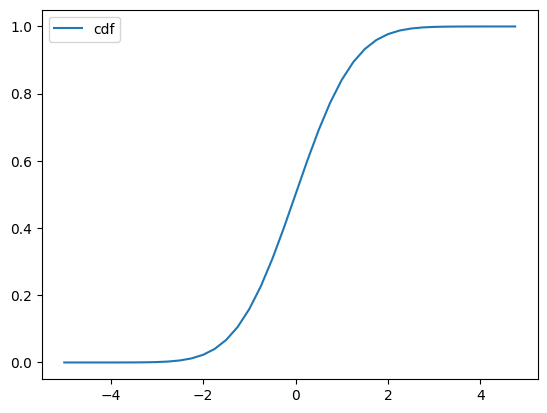

In [ ]:
# Lets draw these activation functions to visualize their values to understand their impact on neuron activation.

x = np.arange(-5, 5, 0.25) # x values from -5 to 5 in steps of 0.25.

# # ReLU
# plt.plot(x, relu(x), label="ReLU")

# # tanh
# plt.plot(x, tanh(x), label="tanh")

# # Sigmoid
# plt.plot(x, sigmoid(x), label="Sigmoid")

# # pdf
# plt.plot(x, pdf(x), label="pdf")

# cdf
plt.plot(x, cdf(x), label="cdf")

# # GELU
# plt.plot(x, gelu(x), label="GELU")

# # SiLU
# plt.plot(x, silu(x), label="SiLU")

# Plot methods
plt.legend()
plt.show()


---

## Understanding Embeddings and Batched Computation

Before we dive into more advanced non-linear components, let's clarify how neural networks actually process text and multiple inputs simultaneously.

### From Words to Numbers

Neural networks don't work directly with words—they work with numbers. Each word is represented as an **embedding vector**—a list of floating-point numbers that captures the word's meaning. If our embedding dimension is `d_model` (say, 512), then each word becomes a vector of 512 floats.

**Key insight:** Words with similar meanings have similar embedding vectors. For example, "cat" and "dog" would have embeddings closer to each other than "cat" and "car."

### Processing Multiple Words

In practice, we don't pass one word at a time—we pass sequences of words. If we pass k words (where k ≤ max_context_length), we're actually passing a `k × d_model` matrix to the neural network.

**How neurons process this:**
- Each neuron still holds just a `d_model`-length weight vector
- To compute the weighted sum, we perform: `(k × d_model) @ (d_model × 1)` → `k × 1` output
- Each word's computation is independent—weighted sums for different words don't interfere with each other
- We compute them in a single matrix multiplication to leverage GPU tensor cores for parallel processing

After computing these `k × 1` outputs, we apply the activation function to each value independently—the activation doesn't mix information between different positions in the sequence.

This independence is important to understand because it contrasts with other mechanisms we'll discuss next, which *do* mix information across positions.

---

## Softmax: Mixing Information Across Positions

While activation functions operate independently on each neuron's output, there are other non-linear transformations that intentionally mix information. The most important example is **softmax**.

**Softmax formula:**
```
softmax(x_i) = e^(x_i) / Σ(e^(x_j)) for all j
```

**Key property:** Softmax converts a vector of arbitrary values into a probability distribution—all outputs are between 0 and 1, and they sum to 1.

**Where it's used:**
- In the attention mechanisms of transformers—the revolutionary component that made modern LLMs possible. We'll dive deep into this mechanism in a dedicated notebook.
- At the output layer for classification tasks

**How it differs from activation functions:**
- Activation functions process each value independently
- Softmax uses *all* values in the vector to compute each output
- Each final output value is influenced by all input values

**Why this matters for attention:** In transformer models, softmax is crucial for the attention mechanism. It helps the network decide which parts of the input sequence are most relevant for processing the current position. We'll see exactly how this works when we build attention layers.

---

## Layer Normalization: Stabilizing Across Neurons

Layer normalization is another non-linear operation, but it works differently from both activation functions and softmax.

**What it does:**
If a layer has 4 neurons that output: `[1.0, -0.5, 2.0, -1.0]`, layer normalization transforms these values to `[0.52, -0.87, 1.39, -1.04]` so that:
- Their mean becomes 0
- Their standard deviation becomes 1

**Formula:**
```
LayerNorm(x) = γ × (x - μ) / σ + β
```
where:
- μ is the mean of all neurons in the layer
- σ is the standard deviation
- γ (gamma) and β (beta) are learnable scale and shift parameters

**Why it's important:**
- **Stabilizes training:** Prevents values from growing too large or too small
- **Faster convergence:** Networks learn more quickly
- **Prevents vanishing/exploding gradients:** Keeps gradients in a healthy range
- **Enables deeper networks:** Without layer norm, very deep networks often fail to train

**Where it's applied:**
Layer normalization is typically applied:
- After attention layers in transformers
- Before or after feed-forward layers
- The exact placement (pre-norm vs post-norm) is an architectural choice

---

## Batch Normalization: Normalizing Across Examples

Batch normalization is conceptually similar to layer normalization, but it normalizes across a different dimension—across the **batch** rather than across the layer's neurons.

**What it does:**
Instead of normalizing across all neurons in a layer for a single example, batch normalization normalizes each feature (neuron) across all examples in the batch.

If we have a batch of 32 images and a layer with 128 neurons:
- **Layer Norm:** For each image, normalize the 128 neuron values
- **Batch Norm:** For each neuron, normalize its values across the 32 images

**Formula:**
```
BatchNorm(x) = γ × (x - μ_batch) / σ_batch + β
```
where:
- μ_batch is the mean of this feature across all examples in the batch
- σ_batch is the standard deviation across the batch
- γ (gamma) and β (beta) are learnable scale and shift parameters

**Benefits:**
- Stabilizes training by reducing internal covariate shift
- Allows higher learning rates
- Acts as a form of regularization
- Can reduce sensitivity to weight initialization

**Why it works better for images:**
Batch normalization is extremely popular in computer vision models (CNNs like ResNet, EfficientNet, etc.) and performs remarkably well. This is likely because:
- Even completely different images share low-level visual features (edges, corners, textures, color distributions)
- These shared statistical properties make it meaningful to normalize across different images
- The assumption that features should have similar distributions across examples holds reasonably well

**Why it's NOT common in LLMs:**
Batch normalization is rarely used in modern language models and transformers. Here's why:
- Text sequences in a batch are typically **unrelated**—different sentences have completely different content
- Normalizing "the" in one sentence with "quantum" in another doesn't make semantic sense
- Unlike images that share low-level visual patterns, text sequences don't share meaningful statistical properties just because they're in the same batch
- **Variable sequence lengths** make batch normalization awkward to implement
- Layer normalization works better because it normalizes within a single sequence, where the features are actually related

**Key Insight:**
The effectiveness of normalization depends on whether examples in your batch share meaningful statistical properties:
- **Images:** Yes → Batch norm works great
- **Text:** No → Layer norm is preferred
- **Tabular data:** Depends on the problem

This is why you'll see batch normalization in vision architectures (ResNet, VGG) but layer normalization in language models (GPT, BERT, Llama).


---

## Loss Functions: Measuring Prediction Quality

The final piece of non-linearity in neural networks is the **loss function**—how we measure the distance between our prediction and the target.

Loss functions are typically non-linear and serve as the starting point for backpropagation. Common loss functions include:

### Mean Squared Error (MSE)
```
MSE = (1/n) × Σ(prediction - target)²
```
Used for regression tasks.

### Cross-Entropy Loss
```
CrossEntropy = -Σ(target × log(prediction))
```
Used for classification tasks. Works particularly well with softmax outputs. This is what GPT like LLMs use.

### Binary Cross-Entropy
```
BCE = -[y × log(ŷ) + (1-y) × log(1-ŷ)]
```
Used for binary classification (yes/no decisions).

**Why loss functions matter for backpropagation:**
The loss function's derivative with respect to the output is the starting point for the backward pass. This is where we compute `dloss/doutput` and begin propagating gradients back through the network.

---

## Summary: The Complete Picture

Now you understand all the key non-linear components in a neural network:

1. **Activation functions** (ReLU, GELU, etc.): Add non-linearity at each neuron, enabling complex pattern learning
2. **Softmax**: Mixes information across sequence positions, crucial for attention mechanisms
3. **Layer normalization**: Stabilizes values across neurons within each example, enabling deeper networks (preferred for LLMs)
4. **Batch normalization**: Stabilizes values across examples in a batch (preferred for computer vision)
5. **Loss functions**: Measure prediction quality and initiate the backward pass

Each serves a distinct purpose, and together they enable neural networks to learn effectively. The choice between layer norm and batch norm depends on your domain—text models use layer norm because sequences are independent, while image models use batch norm because images share low-level visual features.

In the rest of this notebook, we'll implement all of these components from scratch, including their gradients for backpropagation.

In [ ]:
# Let's define some loss functions

def mse_loss(prediction, target):
  return (prediction - target)**2

---

# Derivative Basics

In neural networks, differentiation plays an important role. When an input passes through neural networks, it goes through many computations involving model parameters and finally returns an output. These computations with inputs and model parameters can be linear or non-linear, but both are differentiable.

Derivatives of linear functions are quite simple. For non-linear functions, these are mostly the activation functions we discussed in the previous sections.

To understand the derivatives of these non-linear activation functions, we need to review some derivative concepts from calculus so that we can both derive and memorize the derivatives of these non-linear functions.

---

## Important Functions Cheatsheet

Before jumping to derivatives, we need to review some common functions that we'll use in differentiation.

**Important non-linear functions:**

1. **Taylor series:** `e^x = 1 + x + x²/2! + x³/3! + ...`

2. **Exponential limit:** `(e^x - 1) / x = 1` when x → 0  
   *Proof: Expand e^x using Taylor series*

3. **Hyperbolic sine:** `sinh(x) = (e^x - e^(-x)) / 2`

4. **Hyperbolic cosine:** `cosh(x) = (e^x + e^(-x)) / 2`

5. **Sinh limit:** `sinh(x) / x = 1` when x → 0  
   *Proof: Expand sinh(x) using Taylor series*

6. **Cosh limit:** `(cosh(x) - 1) / x = 0` when x → 0  
   *Proof: Expand cosh(x) using Taylor series*

7. **Sinh addition formula:** `sinh(a + b) = sinh(a)·cosh(b) + cosh(a)·sinh(b)`

8. **Cosh addition formula:** `cosh(a + b) = cosh(a)·cosh(b) + sinh(a)·sinh(b)`

---

## Differentiation Cheatsheet

The main way to numerically verify that a derivative is correct is to use the **limit definition**:

```
f'(x) = lim[h→0] (f(x+h) - f(x)) / h
```

### Basic Differentiation Rules

Here are the fundamental formulas needed for backpropagation implementation:

1. **Constant multiple:** `d(kx)/dx = k`

2. **Constant:** `dk/dx = 0`

3. **Sum rule:** `d(y + z)/dx = dy/dx + dz/dx` (where y and z depend on x)

4. **Constant multiple rule:** `d(ky)/dx = k·dy/dx` (where k is constant)

5. **Chain rule:** `dz/dx = dz/dy · dy/dx`

6. **Power rule:** `d(x^n)/dx = n·x^(n-1)` (where n is constant)

7. **Exponential:** `d(e^x)/dx = e^x`

8. **Exponential with constant:** `d(e^(kx))/dx = k·e^(kx)` (where k is constant)

9. **Product rule:** `d(y·z)/dx = z·dy/dx + y·dz/dx`

10. **Quotient rule:** `d(y/z)/dx = (z·dy/dx - y·dz/dx) / z²`
    
    **Proof:**
    ```
    d(y/z)/dx = y·d(1/z)/dx + (1/z)·dy/dx
              = -y/z² · dz/dx + (1/z)·dy/dx
              = -y/z² · dz/dx + (z/z²)·dy/dx
              = (z·dy/dx - y·dz/dx) / z²
    ```

---

## Derivatives of Hyperbolic Functions

### 11. Derivative of sinh(x)

**Result:** `d(sinh(x))/dx = cosh(x)`

**Approach 1 (Using limit definition):**

*Proof:*
```
d(sinh(x))/dx = lim[h→0] (sinh(x+h) - sinh(x)) / h
              = lim[h→0] (sinh(x)·cosh(h) + cosh(x)·sinh(h) - sinh(x)) / h
              = lim[h→0] [sinh(x)·(cosh(h)-1)/h + cosh(x)·sinh(h)/h]
              = sinh(x)·0 + cosh(x)·1  (using limits from section above)
              = cosh(x)
```

**Approach 2 (Direct differentiation):**

*Proof:*
```
sinh(x) = (e^x - e^(-x)) / 2

d(sinh(x))/dx = d((e^x - e^(-x))/2)/dx
              = (d(e^x)/dx - d(e^(-x))/dx) / 2
              = (e^x - (-1)·e^(-x)) / 2
              = (e^x + e^(-x)) / 2
              = cosh(x)
```

---

### 12. Derivative of cosh(x)

**Result:** `d(cosh(x))/dx = sinh(x)`

**Approach 1 (Using limit definition):**

*Proof:*
```
d(cosh(x))/dx = lim[h→0] (cosh(x+h) - cosh(x)) / h
              = lim[h→0] ((e^(x+h) + e^-(x+h))/2 - (e^x + e^(-x))/2) / h
              = lim[h→0] (e^x·e^h + e^(-x)·e^(-h) - e^x - e^(-x)) / (2h)
              = lim[h→0] [e^x(e^h - 1)/(2h) + e^(-x)(e^(-h) - 1)/(2h)]

Now apply the limits:
- lim[h→0] (e^h - 1)/h = 1
- lim[h→0] (e^(-h) - 1)/h = -1

Therefore:
              = e^x(1)/2 + e^(-x)(-1)/2
              = e^x/2 - e^(-x)/2
              = (e^x - e^(-x)) / 2
              = sinh(x) ✓
```

**Approach 2 (Direct differentiation):**

*Proof:*
```
cosh(x) = (e^x + e^(-x)) / 2

d(cosh(x))/dx = d((e^x + e^(-x))/2)/dx
              = (d(e^x)/dx + d(e^(-x))/dx) / 2
              = (e^x - e^(-x)) / 2
              = sinh(x)
```

---

## Derivatives of Activation Functions

### 13. Derivative of tanh(x)

**Result:** `d(tanh(x))/dx = 1 - tanh²(x)`

**Proof:**
```
tanh(x) = sinh(x) / cosh(x)

Using quotient rule:
d(tanh(x))/dx = (cosh(x)·d(sinh(x))/dx - sinh(x)·d(cosh(x))/dx) / cosh²(x)
              = (cosh(x)·cosh(x) - sinh(x)·sinh(x)) / cosh²(x)
              = (cosh²(x) - sinh²(x)) / cosh²(x)
              = 1 - sinh²(x)/cosh²(x)
              = 1 - tanh²(x)
```

**Key property:** The derivative can be expressed in terms of the function itself! ✓

---

### 14. Derivative of sigmoid(x)

**Result:** `d(sigmoid(x))/dx = sigmoid(x)·(1 - sigmoid(x))`

**Approach 1 (Direct differentiation):**

*Proof:*
```
sigmoid(x) = 1 / (1 + e^(-x))

Let y = 1 + e^(-x), so sigmoid(x) = 1/y

Using chain rule:
d(sigmoid(x))/dx = d(sigmoid)/dy · dy/dx
                 = -1/y² · (-e^(-x))
                 = e^(-x) / (1 + e^(-x))²
```

**Approach 2 (Expressing in terms of sigmoid):**

*Proof:*
```
d(sigmoid(x))/dx = e^(-x) / (1 + e^(-x))²

Factor the denominator:
= 1/(1 + e^(-x)) · e^(-x)/(1 + e^(-x))
= 1/(1 + e^(-x)) · (1 + e^(-x) - 1)/(1 + e^(-x))
= 1/(1 + e^(-x)) · (1 - 1/(1 + e^(-x)))
= sigmoid(x) · (1 - sigmoid(x))
```

**Key property:** The derivative can be expressed in terms of the function itself! ✓

---

### 15. Derivative of ReLU(x)

**Result:** `d(ReLU(x))/dx = 1 if x > 0, else 0`

**Note:** Technically, ReLU is not differentiable at x = 0 (left derivative = 0, right derivative = 1). However, in machine learning, we make it differentiable by convention by setting the derivative to 0 at x = 0.

---

Here are the SiLU and GELU derivative sections to add to your document:

---

### 16. Derivative of SiLU(x) / Swish(x)

**Result:** `d(SiLU(x))/dx = sigmoid(x) · [1 + x · (1 - sigmoid(x))]`

**Proof using product rule:**
```
SiLU(x) = x · sigmoid(x)

Using product rule: d(u·v)/dx = u·dv/dx + v·du/dx

d(SiLU(x))/dx = x · d(sigmoid(x))/dx + sigmoid(x) · dx/dx
              = x · sigmoid(x) · (1 - sigmoid(x)) + sigmoid(x)
              = sigmoid(x) · [x · (1 - sigmoid(x)) + 1]
              = sigmoid(x) · [1 + x · (1 - sigmoid(x))]
```

**Alternative form:**
```
d(SiLU(x))/dx = SiLU(x) · (1 - sigmoid(x)) + sigmoid(x)
```

**Key property:** The derivative can be expressed in terms of sigmoid and SiLU itself! ✓

**Implementation note:**
- During forward pass: compute `s = sigmoid(x)` and `silu = x · s`
- During backward pass: compute gradient as `s · (1 + x · (1 - s))`

---

### 17. Derivative of GELU(x)

**Result:** `d(GELU(x))/dx = x · φ(x) + Φ(x)`

where:
- `Φ(x)` is the CDF (Cumulative Distribution Function) of standard normal
- `φ(x)` is the PDF (Probability Density Function) of standard normal

**Proof using product rule:**
```
GELU(x) = x · Φ(x)

Using product rule:
d(GELU(x))/dx = x · dΦ(x)/dx + Φ(x) · dx/dx
              = x · dΦ(x)/dx + Φ(x)
```

**Key insight - Fundamental Theorem of Calculus:**

The derivative of the CDF is the PDF!

```
Since: Φ(x) = ∫_{-∞}^{x} φ(t) dt

Then: dΦ(x)/dx = φ(x)
```

**Therefore:**
```
d(GELU(x))/dx = x · φ(x) + Φ(x)
```

**Where:**
```
φ(x) = (1/√(2π)) · e^(-x²/2)  [Standard normal PDF]
Φ(x) = CDF of standard normal   [Can be computed using error function]
```

**In alternative notation:**
```
d(GELU(x))/dx = x · pdf(x) + cdf(x)
```

**Implementation note:**
- During forward pass: compute `Φ(x)` (CDF) and `gelu = x · Φ(x)`
- During backward pass: need both `φ(x)` (PDF) and `Φ(x)` (CDF)
- Common to use the tanh approximation for both forward and backward passes:
  ```
  GELU(x) ≈ 0.5 · x · (1 + tanh(√(2/π) · (x + 0.044715 · x³)))
  ```

---

## Why Self-Referential Derivatives Matter:

**Important Note:** When derivatives can be computed using the original function value, they're especially valuable in coding because we can reuse the forward pass values during backpropagation.

**Examples of self-referential derivatives:**

1. **Tanh:** `d(tanh(x))/dx = 1 - tanh²(x)`
   - During forward pass: compute `y = tanh(x)`
   - During backward pass: compute gradient as `1 - y²`

2. **Sigmoid:** `d(sigmoid(x))/dx = sigmoid(x)·(1 - sigmoid(x))`
   - During forward pass: compute `y = sigmoid(x)`
   - During backward pass: compute gradient as `y·(1 - y)`

3. **SiLU:** `d(SiLU(x))/dx = sigmoid(x)·[1 + x·(1 - sigmoid(x))]`
   - During forward pass: compute `s = sigmoid(x)` and `silu = x·s`
   - During backward pass: compute gradient as `s·(1 + x·(1 - s))`

**Partial self-referential derivatives:**

4. **GELU:** `d(GELU(x))/dx = x·φ(x) + Φ(x)`
   - During forward pass: compute `Φ(x)` (CDF)
   - During backward pass: need both `φ(x)` (PDF) and `Φ(x)` (CDF)
   - Can reuse the CDF from forward pass, but must compute PDF separately

This saves computation by avoiding recalculating exponentials during backpropagation!

---

# Gradient Descent and Computation basics

## What is a Gradient?

Gradient is a fundamental concept that applies not just to neurons or neural networks, but to any variables and their computations (like addition or multiplication).

Let's start understanding gradients without thinking about neural networks or model parameters—we'll introduce those concepts later.

For example, say we have two variables `a` and `b`, and we perform some computations:
```
c = a + b
d = 2*c - 1
e = d + b
loss = (e - 2)²
```

The gradient of each variable is the derivative of the final output (loss) with respect to that variable:

```
gradient_loss = dloss/dloss
gradient_e = dloss/de
gradient_d = dloss/dd
gradient_c = dloss/dc
gradient_b = dloss/db
gradient_a = dloss/da
```

**What does it represent?** For example, `gradient_b` represents how fast the loss changes when we change `b`.

**Why is this useful?** If we know `gradient_b`, then we can:
- Increase `b` in the gradient direction to increase loss
- Decrease `b` in the gradient direction to decrease loss

This is the main goal in neural networks: **decrease the final loss by modifying the parameters**.

### Why Compute Gradients for Intermediate Variables?

Can we update variable `c` to change the loss? We can't directly, because `c` is computed using `a` and `b`. It's a computed variable, not a parameter. The actual parameters are `a` and `b`. To change `c`, we need to change `a` and `b`, which will eventually update the loss.

So if we can only change `a` and `b`, do we need to compute the gradients of `c`, `d`, and `e`? **Yes, we do.** We cannot compute `gradient_a` without first computing `gradient_c`, and so on. This is because `loss` and `a` are not in the same computation step, so we can't directly calculate `dloss/da`. We can only compute this using the **chain rule** by computing gradients of all the intermediate computations.

---

## Gradient Descent via Chain Rule

Let's understand this with the example we discussed above:
```
c = a + b
d = 2*c - 1
e = d + b
loss = (e - 2)²
```

Say `a = 1` and `b = 2`:
```
c = 3
d = 5
e = 7
loss = 25
```

Our goal is to find `dloss/da` and `dloss/db` so that we can update the loss by changing `a` and `b`.

### Step-by-Step Gradient Calculation

To calculate gradients, we start from the loss variable.

**Step 1: Gradient of loss**
```
dloss/dloss = 1.0
gradient_loss = 1.0
```
That was easy!

**Step 2: Gradient of e**

How was loss created?
```
loss = (e - 2)²
```

The variable `e` was involved in computing the loss. Let's calculate the gradient of `e`:
```
dloss/de = gradient_e = 2(e - 2) = 2(7 - 2) = 10
```

**Step 3: Gradient of d and b (from e computation)**

How was `e` created?
```
e = d + b
```

Both `d` and `b` were involved in computing `e`. Let's calculate their gradients:
```
gradient_d = dloss/dd
gradient_b = dloss/db
```

But our equation doesn't directly involve `loss`. The **chain rule** helps here:
```
gradient_d = dloss/dd = (dloss/de) × (de/dd) = 10 × 1.0 = 10
gradient_b = dloss/db = (dloss/de) × (de/db) = 10 × 1.0 = 10
```

Since `b` is a parameter itself, we've reached the end for `b` (we'll accumulate this later). Let's focus on how `d` was computed.

**Step 4: Gradient of c (from d computation)**

How was `d` computed?
```
d = 2*c - 1
```

The variable `c` was involved. Let's find `gradient_c` using the chain rule:
```
gradient_c = dloss/dc = (dloss/dd) × (dd/dc) = 10 × 2 = 20
```

**Step 5: Gradient of a and b (from c computation)**

How was `c` computed?
```
c = a + b
```

We need to calculate `gradient_a` and `gradient_b`, but wait—we already calculated `gradient_b` during the `e = d + b` computation. Do we find it again?

**Yes!** Here we find the gradient of `b` due to the computation of `c`, and earlier we found the gradient of `b` due to the computation of `e`. We need to **accumulate (sum)** both contributions to find the final gradient of `b`. This also shows us that computations form a **graph** structure.

```
gradient_a = (dloss/dc) × (dc/da) = 20 × 1 = 20
gradient_b = gradient_b_from_e + (dloss/dc) × (dc/db) = 10 + 20 × 1 = 30
```

**Done!** We've finally calculated `gradient_a = 20` and `gradient_b = 30`. As you can see, we had to traverse the entire computation graph from end to start, calculating gradients of all intermediate variables to finally compute the gradients of our parameters.

### What Do These Gradients Tell Us?

What does `gradient_a = 20` and `gradient_b = 30` mean?

- When you increase `a` by an infinitesimal amount δ, the loss increases by δ × 20
- When you increase `b` by the same amount δ, the loss increases by δ × 30
- The same relationship applies for decreases

Let's verify this for `a`. If δ = 0.001:
```
a = 1 + 0.001 = 1.001
b = 2
c = a + b = 3.001
d = 2*c - 1 = 5.002
e = d + b = 7.002
loss = (e - 2)² = 25.02
```
`a` increased by 0.001, causing loss to increase by 0.02 ≈ 20 × 0.001. Perfect!

Let's try the same for `b`:
```
a = 1
b = 2 + 0.001 = 2.001
c = a + b = 3.001
d = 2*c - 1 = 5.002
e = d + b = 7.003
loss = (e - 2)² = 25.03
```
`b` increased by 0.001, causing loss to increase by 0.03 ≈ 30 × 0.001. Perfect!

**Key takeaway:** If the gradient is positive, we reduce the parameter value by a small δ to reduce the loss. If the gradient is negative, we increase the parameter value by a small δ to reduce the loss.

---

## Stochastic Gradient Descent

Should we reduce both `a` and `b` by the same amount (say 0.001) to reduce the loss? We could, but that's not optimal. When a gradient is numerically high, reducing the parameter by a larger amount will reduce the loss faster—and that's our goal: minimize the loss as quickly as possible.

Instead of reducing the parameter by `δ`, we should reduce it by `δ × gradient`. This will reduce the loss by approximately `δ × gradient²`. This is called **Stochastic gradient descent**. Think of it as acceleration when descending a hill, rather than constant velocity. The steeper the hill (higher gradient), the faster we descend.

This small `δ` is the same for all parameters and is called the **learning rate**, but each parameter is adjusted by the learning rate multiplied by its own gradient.

### Example with Stochastic Gradient Descent

Let's try our example again. For visualization purposes, we'll show the case of *increasing* values to increase loss (numbers like 1.02 are easier to read than 0.98), but the principles are identical for reduction.

**For parameter a:**
```
learning_rate = 0.001
a = 1 + learning_rate × gradient_a = 1 + 0.001 × 20 = 1.02
b = 2
c = a + b = 3.02
d = 2*c - 1 = 5.04
e = d + b = 7.04
loss = (e - 2)² = 25.4
```
`a` increased by 0.02, causing loss to increase by 0.4 (20 times the change in `a`).

**For parameter b:**
```
learning_rate = 0.001
a = 1
b = 2 + learning_rate × gradient_b = 2 + 0.001 × 30 = 2.03
c = a + b = 3.03
d = 2*c - 1 = 5.06
e = d + b = 7.09
loss = (e - 2)² = 25.9
```
`b` increased by 0.03, causing loss to increase by 0.9 (30 times the change in `b`).

**Updating both parameters simultaneously:**

Normally when reducing loss, we update all parameters at once. Let's see the combined case:
```
learning_rate = 0.001
a = 1 + learning_rate × gradient_a = 1 + 0.001 × 20 = 1.02
b = 2 + learning_rate × gradient_b = 2 + 0.001 × 30 = 2.03
c = a + b = 3.05
d = 2*c - 1 = 5.1
e = d + b = 7.13
loss = (e - 2)² = 26.3
```
Both parameters increased (`a` by 0.02, `b` by 0.03), causing loss to increase by 1.3 (0.4 contribution from `a` and 0.9 contribution from `b`).

---

# Gradient Computation with the `Scalar` Class

## The Scalar Class

Now that we understand gradient descent, the chain rule, and computation graphs, it's time to solidify our understanding by diving into the implementation.

We'll define a `Scalar` class that serves as a wrapper around variables involved in computations—whether they're parameters or computed variables. We'll have a `Scalar` instance corresponding to each variable.

**Why create this wrapper?** The `Scalar` class will hold the graph of computations that occur during the forward pass. For example:
```
c = a + b
d = 2*c - 1
e = d + b
loss = (e - 2)²
```

### The `grad` Variable

Each `Scalar` instance has a `grad` variable that stores the gradient of that variable. During the forward pass, gradients are initialized to zero since they haven't been computed yet.

We'll later add gradient computation logic to the `Scalar` class through the **backward pass**. The backward pass is the step that actually computes gradients for each variable and updates them in the `grad` variable.

### Adding the Dependency Graph

Each `Scalar` stores optional `prev` elements—the variables from which the current `Scalar` was computed. Since every `Scalar` has this `prev` attribute, we automatically create the computation/dependency graph.

- If `prev` is `None`, it's a **leaf node**—these are the parameters, not computed variables
- All intermediate values created during computations will have `prev` defined, forming the edges of our computation graph

### Visualizing the Computation Graph

Since each `Scalar` contains references to its predecessor values via `prev`, we can visualize the entire computation graph using libraries like Graphviz. This makes it easy to see how data flows through our computations.

---

## Implementing Backward Pass at Each Operation

During the forward pass, all gradients are initialized to zero for every computed variable and parameter.

During the backward pass, gradients are computed from end to start using the chain rule. We add a `_backward()` method for each operation so that each computation knows how to calculate gradients at its local level.

**Note:** We haven't discussed the gradient of a *neuron* yet because gradients are much more granular than neurons. Gradients exist at the level of each computed variable, parameter, and input value. A neuron involves a weighted sum plus bias, so there are many computed variables, parameters, and input values involved in it.

**Note:** In backward pass, don't use `Scalar`'s add, multiply function. Instead do the computation in normal float because during backward pass, we are not trying to create computation graph.

### The Main `backward()` Method

In addition to implementing `_backward()` at each operation level, we'll implement a main `backward()` method that's executed only by the variable for which we want to compute gradients—typically the loss variable. This `backward()` method is responsible for calling all the `_backward()` methods in topological order (from the loss backwards through the computation graph).

You can think of this as the **entry point** to the backward pass computation. With this, our basic gradient computation implementation is ready.

---

## Implementing requires_grad

Now let's start improving the implementation with neural networks in mind. With the current implementation, we are computing the gradient for each parameter, computed variable, and even static values.

We know that in the computation graph, the leaf nodes will be the input values, model parameters, and static values. Out of these, we want to compute the gradients for model parameters only. Why? We don't need to compute gradients for inputs because the input is not part of the neural network and it changes. Thus, changing inputs to reduce loss doesn't make sense. Similarly, since static values can't be changed, there's no point in computing gradients for them.

So we are adding a `requires_grad` optional variable with default `False`. If `requires_grad` is false, its grad is 0 and never updated. Additionally, its `_backward` function is not set. This improves efficiency in gradient computation, i.e., backpropagation is done only for necessary computed variables and model parameters.

---

## Resetting Gradients to Zero

- In training, we compute gradients for each training step. Once a training step is done and we move to the next training step, all the computed variables are gone but the model parameters remain the same. So, we should clear the gradients of these model parameters from the previous step; otherwise, we will accumulate old gradients, corrupting the training.
- Currently we don't have a single dedicated place/class where all these parameters are defined so that we can set just their gradients to zero. Thus, only for testing and debugging purposes, we are defining a `zero_grad` method within the `Scalar` class which traverses the entire computation graph and resets all variables' gradients to 0.0.
- We should not use this in neural networks as it resets the gradients of all computed variables as well, which is inefficient for neural networks since those computed variables are gone anyway in the next training step. We will define a separate `zero_grad` within the neural network implementation which performs this resetting efficiently.

---

## Adding ReLU Operation

We have implemented basic computations that are sufficient for experimenting with backpropagation. However, to integrate backpropagation into a neural network, we also need non-linear activation functions. One common activation function used in modern neural networks is ReLU.

We have already defined ReLU and its derivative. Now, we will add ReLU directly to the `Scalar` class. This allows us to implement both the forward pass (ReLU computation) and backward pass (gradient computation) together, keeping the operation and its gradient logic in one place.

For education and testing purposes, its better to have `leaky_relu` as well which instead of setting zero for -ve values, returns very small values near to zero. This allows us to avoid test cases which make the output values zero and thus harder to test and debug things.

---

## Adding power operation

When a neural network predicts an output, we calculate the **loss** from it to know how far the prediction is from our target. One of the common loss function in simple neural network is mean square error i.e `mse_loss`. This `mse_loss` uses power operation. So let's add the power function as well.

---

## Summary

By implementing this `Scalar` class with automatic gradient computation, we're building the foundation for automatic differentiation—the core mechanism that powers modern deep learning frameworks like PyTorch and TensorFlow.

In [ ]:
class Scalar:
  def __repr__(self):
    return f"{self.data}"

  def __init__(self, data, prev=None, requires_grad=False, label=None, op=None):
    self.data = data
    self.grad = 0.0
    self.requires_grad = requires_grad

    self._prev = prev if prev else []
    self._backward = lambda: None

    # Label and op is defined only for visualization purposes.
    self._label = label
    self._op = op

  def __add__(self, other):
    # If x = self, y = other, out = x + y,
    # grad_out = dloss/dout, grad_x = dloss/dx, grad_y = dloss/dy
    # grad_x = grad_out * dout/dx = grad_out (as dout/dx = 1 for addition)
    # grad_y = grad_out * dout/dy = grad_out (as dout/dy = 1 for addition)
    # As gradients are accumulated from multiple paths, we should do += and not overriding the grad.
    other = other if isinstance(other, Scalar) else Scalar(other)
    out = Scalar(self.data + other.data, prev=(self, other), op='+')
    out.requires_grad = self.requires_grad or other.requires_grad

    def _backward():
      if self.requires_grad:
        self.grad += out.grad
      if other.requires_grad:
        other.grad += out.grad

    if out.requires_grad:
      out._backward = _backward
    return out


  def __mul__(self, other):
    # x = self, y = other, out = x * y
    # grad_x = grad_out * dout/dx = grad_out * y
    # grad_y = grad_out * dout/dy = grad_out * x
    other = other if isinstance(other, Scalar) else Scalar(other)
    out = Scalar(self.data * other.data, prev=(self, other), op='*')
    out.requires_grad = self.requires_grad or other.requires_grad

    def _backward():
      if self.requires_grad:
        self.grad += out.grad * other.data
      if other.requires_grad:
        other.grad += out.grad * self.data

    if out.requires_grad:
      out._backward = _backward
    return out

  def backward(self):
      """
      Perform backpropagation to compute gradients.

      Uses topological sort to ensure each node's gradient is computed
      before it's needed by its children in the backward pass.
      """
      # Skip computation if requires_grad = false
      if not self.requires_grad:
        return

      # Gradient of loss with respect to itself is 1.0
      self.grad = 1.0

      # Build topological ordering (inputs to outputs)
      visited = set()
      topo = []

      def topo_sort(val):
          visited.add(val)
          for prev_val in val._prev or []:
              if prev_val not in visited:
                  topo_sort(prev_val)
          topo.append(val)

      # Build the topological order starting from output (self)
      topo_sort(self)

      # Backpropagate in REVERSE topological order (outputs to inputs)
      # This ensures dependencies are satisfied: a node's gradient is
      # computed before we use it to compute its children's gradients
      for val in reversed(topo):
          val._backward()

  def zero_grad(self):
    # Note: Don't use this method for neural networks. Define zero_grad within
    # neurons, neural layers instead which resets the gradients for model
    # parameters instead of traversing the entire computation graph which is
    # unnecessary.
    visited = set()

    def _zero_grad(val):
      if val in visited:
        return
      visited.add(val)
      val.grad = 0.0
      for prev_val in val._prev or []:
        _zero_grad(prev_val)

    _zero_grad(self)

  def __sub__(self, other):
    return self + (other * -1) # Reusing existing functions will allow reusing their gradients when we define it.

  def __neg__(self):
    return self * -1

  def __rmul__(self, other):
    return self.__mul__(other)

  def relu(self):
    # x = self, out = max(0, x)
    # dloss/dx = dloss/dout * dout/dx
    # dout/dx = 1 if x > 0 else 0
    out = Scalar(max(0, self.data), prev=(self,), op='ReLU')
    out.requires_grad = self.requires_grad
    def _backward():
      if self.requires_grad:
        self.grad += out.grad * (self.data > 0) # self.data > 0 returns True/False which python then treats as 1/0

    if out.requires_grad:
      out._backward = _backward
    return out

  def leaky_relu(self, alpha=0.01):
    # Allow small negative values to testing and eduction purposes. Not to be used in real models.
    out = Scalar(self.data if self.data > 0 else self.data * alpha, prev=(self,), op='ReLU')
    out.requires_grad = self.requires_grad
    def _backward():
      if self.requires_grad:
        self.grad += out.grad * (1 if self.data > 0 else alpha)

    if out.requires_grad:
      out._backward = _backward
    return out

  def __pow__(self, k: float):
    # Note: k is python float and not of `Scaler` instance. Currently we just
    # need x^k support and not x^y support.
    #
    # x = self, out = x**k
    # dloss/dx = dloss/dout * dout/dx = grad_out * k * x**(k-1)
    out = Scalar(self.data**k, prev=(self,), op='pow')
    out.requires_grad = self.requires_grad
    def _backward():
      if self.requires_grad:
        self.grad += out.grad * k * self.data**(k-1)
    if out.requires_grad:
      out._backward = _backward
    return out


In [ ]:
import graphviz

def _create_viz_graph(dot, val, visited):
    # Check if already visited
    node_id = str(id(val))
    if node_id in visited:
        return  # Early return

    # Add node to visited
    visited.add(node_id)

    # Scalar node
    prefix = f'{val._label} | ' if val._label else ''
    label = f'{prefix}val={val.data} | grad={val.grad}'
    dot.node(
        node_id,
        label,
        shape='box',
        style='filled',
        fillcolor='lightblue',
        fontname='Arial'
    )

    if not val._op:
        return  # Early return as its leaf node

    # Op node and Edge
    op_id = node_id + '_op'
    dot.node(
        op_id,
        label=val._op,
        shape='circle',
        style='filled',
        fillcolor='lightgray',
        fontname='Arial Bold'
    )
    dot.edge(op_id, node_id, color='black', penwidth='2')

    # Prev nodes
    for prev_val in val._prev or []:
        prev_node_id = str(id(prev_val))
        dot.edge(prev_node_id, op_id, color='gray', penwidth='1.5')
        _create_viz_graph(dot, prev_val, visited)


def visualize_computations(val):
    dot = graphviz.Digraph(graph_attr={'rankdir': 'LR'})

    # Create all nodes and edges
    visited = set()
    _create_viz_graph(dot, val, visited)

    # Find all leaf nodes (nodes with no _prev or empty _prev)
    leaf_nodes = set()

    def find_leaves(v, visited_leaves):
        node_id = str(id(v))
        if node_id in visited_leaves:
            return
        visited_leaves.add(node_id)

        # Check if it's a leaf
        if not v._prev:
            leaf_nodes.add(node_id)
        else:
            # Recurse to children
            for prev_val in v._prev:
                find_leaves(prev_val, visited_leaves)

    find_leaves(val, set())

    # Align all leaf nodes vertically
    if leaf_nodes:
        with dot.subgraph() as s:
            s.attr(rank='same')
            for node_id in leaf_nodes:
                s.node(node_id)

    return dot

Loss: 4


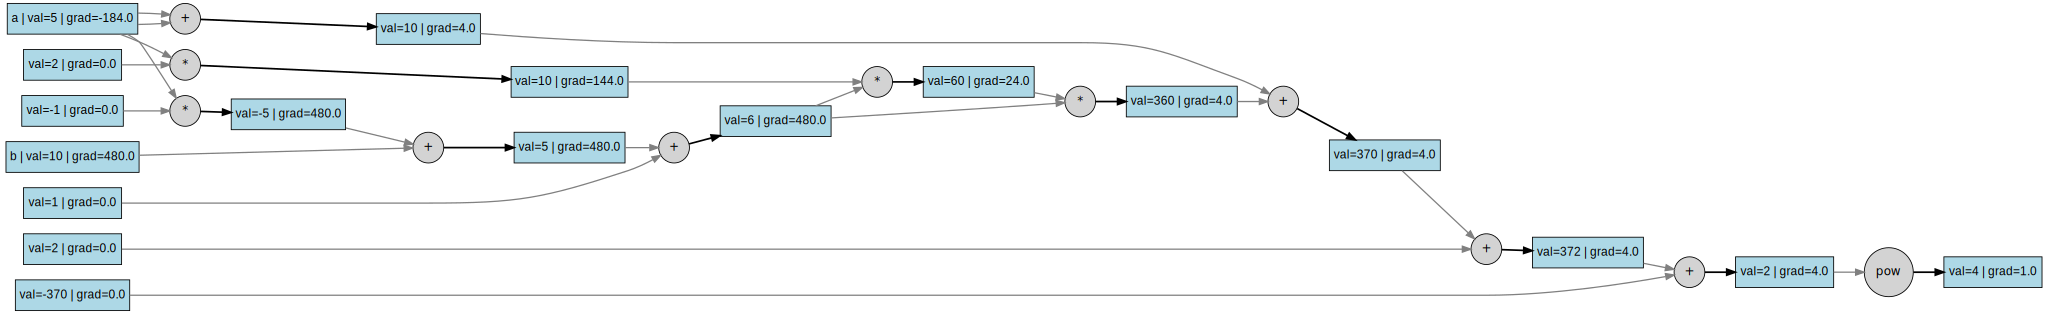

In [ ]:
# Testing the Scalar class

from collections import deque

# Forward pass
a = Scalar(5, label='a', requires_grad=True)
b = Scalar(10, label='b', requires_grad=True)

c = -a + b + 1 # this is same as `c = (a.__add__(b)).__add__(1)`
c.label = 'c'

d = 2 * a * c # this is same as `d = (a.__rmul__(2)).__mul__(c)`
d.label = 'd'

e = a + a
e.label = 'e'

f = e + d * c + 2
f.label = 'f'

target = 370
loss = mse_loss(f, target)
loss.label = 'loss'

print(f"Loss: {loss}")

# Clear the previous gradient computation graph.
loss.zero_grad()

# Do the back propagation
loss.backward()

# Visualize the loss
visualize_computations(loss)


---

# Neural network - Implementation

Let's implement a basic neural layer without using torch library.

# Common NNModule class

There are some methods like `parameters` and `zero_grad` which needs to be defined in multiple classes like in Neuron class, in NeuronLayer class etc. So we can define a common wrapper class called `NNModule` class which contain these methods.

## Neuron
We are implementing Neuron class with basic components like:
- Takes `in_features` to define the input features each neuron gets. This will be set as size of its internal weight parameter vector.
- Creates the weight parameter vector with each parameter a `Scalar` instance with `requires_grad` to true. This enables neural network to create the computation graph during forward pass, and compute its gradients during the backward pass.
- Each of the weight parameter is **randomly** initialized. This is very important. If we set them to zero, then all the neurons of the entire network will be identical and thus they will identical things, and thus each neuron will be same.. representing same feature. Instead if they are randomly initialized, then each neuron learns something new.. some different complext pattern.. lots of differnt features.

Forward pass:
- Forward pass accepts input vector whose size **has to be equal to** the weight parameter vector size.
- Forward pass takes weighted sum of the input sequence
- Then it applies activation function `ReLU` (leaky version for testing purposes) to return the neuron's output representing how activated the neuron is for the given input.

Backward pass:
- We don't need to define the backward pass at neuron level. It's defined at the parameter level. That' why its present in the `Scalar` class and not in `Neuron` class. Since weight parameters of the neuron are `Scalar` instances, neuron is automatically getting the backward pass ability.

zero_grad:
- Even though we dont need to define backward pass, we should define zero_grad to reset the gradients of model parameters between each training step to avoid corrupting the training by accumulating the gradients from past training steps.

parameters:
- Defining a parameters method such that all parameters of the neuron are returned. This will be used to reset gradients, updating the parameters by the optimizers etc.

In [ ]:
class NNModule:
  def parameters(self):
    return []

  def zero_grad(self):
    for parameter in self.parameters():
      parameter.grad = 0.0

class Neuron(NNModule):
  def __init__(self, in_features):
    self.weights = [
      Scalar(random.uniform(-1,1), requires_grad=True, label=f'w{i}')
      for i in range(in_features)
    ]
    self.bias = Scalar(0.0, requires_grad=True)

  # forward pass
  def __call__(self, x):
    assert len(x) == len(self.weights)

    # Weighed Sum
    output = Scalar(0.0)
    for w_i, x_i in zip(self.weights, x):
      output += w_i * x_i

    # Add bias
    output += self.bias

    # Apply activation function to bring non-linearity
    return output.leaky_relu()

  def parameters(self):
    return self.weights + [self.bias]

Weights: [-0.7312715117751976, 0.6948674738744653, 0.5275492379532281, -0.4898619485211566]
Bias: 0.0
Prediction: 0.28166335574879087
Target: 1.0
Loss: 0.5160075344740882


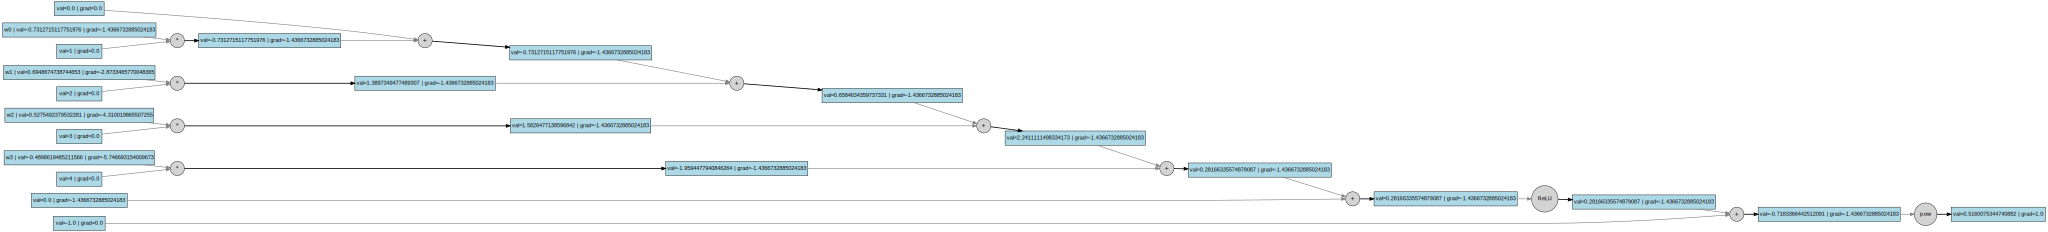

In [ ]:
# Testing the neurons

# Random seed so that in each execution the random values are same. This helps
# in maintaing consistency across multiple runs and thus we can test if the
# neural network is improving with each of our improvements.
random.seed(1)

# Config
in_features = 4
out_features = 2

# Input
x = [1, 2, 3, 4] # Size equal to in_features
target=1.0

# Test neuron's forward pass and backward pass
neuron = Neuron(in_features)
prediction = neuron(x)
loss = mse_loss(prediction, target)
print(f'Weights: {neuron.weights}')
print(f'Bias: {neuron.bias}')
print(f'Prediction: {prediction}')
print(f'Target: {target}')
print(f'Loss: {loss}')
neuron.zero_grad() # Call zero_grad on neuron and not on output.
loss.backward()
visualize_computations(loss)

---

# Neuron Layer

Now lets create a neuron layer.
- A neuron layer has multiple neurons and they don't communicate with each other.
- All of these neurons gets same input but their output might be different based on their internal weight parameters and bias values.  

Forward pass:
- As these neurons don't communicate with each other, we can run forward pass on all of them in parallel. For now, we will run them sequentially for simplicity.
- We then apply layer normalization to the neuron outputs. Layer output is thus the normalized vector of neuron output with size equal to out_features of the layer.

zero_grad:
- Defining zero_grad at neural layer as well so that we don't need to go to each neuron to reset parameter gradients.

parameters:
- Defining a parameters method such that all parameters of the neuron layer are returned.

No layer normalization for now:
We are not adding layer normalization for now to keep our neural network simple. We will introduce that in separate notebook when we implement deep neural networks.

In [ ]:
class NeuronLayer(NNModule):
  def __init__(self, in_features, out_features):
    # in_features: size of each input sample
    # out_features: size of each output sample (number of neurons)
    self.neurons = [Neuron(in_features) for _ in range(out_features)]

  def __call__(self, x):
    # Call forward pass on each neuron.
    return [neuron(x) for neuron in self.neurons]

  def parameters(self):
    params = []
    for neuron in self.neurons:
      params.extend(neuron.parameters())
    return params

Predictions: [0.28166335574879087, 3.0081790787595173]
Targets: [1, 2.5]
Losses: [0.5160075344740882, 0.2582459760888717]


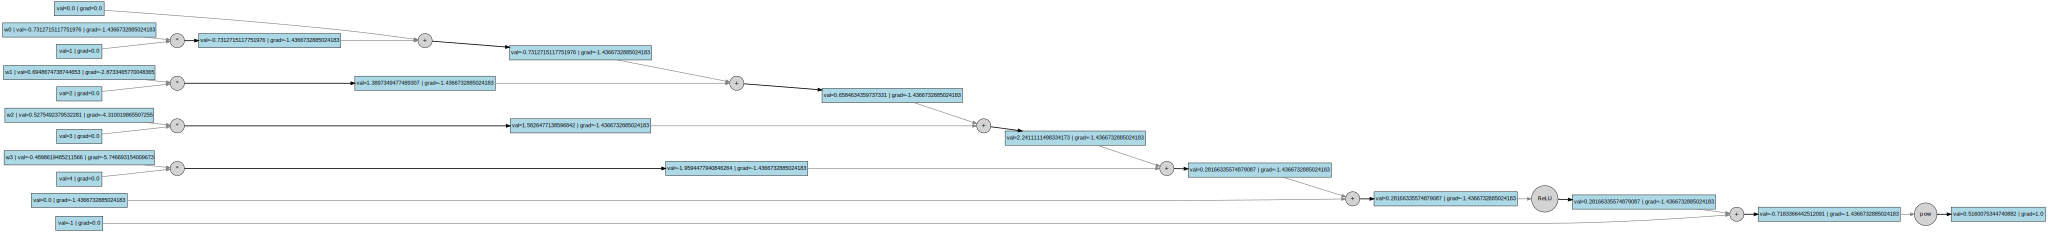

In [ ]:
# Testing the neuron layer

# Random seed so that in each execution the random values are same. This helps
# in maintaing consistency across multiple runs and thus we can test if the
# neural network is improving with each of our improvements.
random.seed(1)

# Config
in_features = 4
out_features = 2

# Input
x = [1, 2, 3, 4] # Size equal to in_features

# Targets
targets = [1, 2.5]

# Test neuron layer's forward pass and backward pass
neuron_layer = NeuronLayer(in_features, out_features)
predictions = neuron_layer(x)
losses = [
    mse_loss(prediction, target)
    for prediction, target in zip(predictions, targets)
  ]
print(f'Predictions: {predictions}')
print(f'Targets: {targets}')
print(f'Losses: {losses}')

neuron_layer.zero_grad()
for loss in losses:
  loss.backward()
visualize_computations(losses[0])


---

## Fully connected Neural network - MLP - Multi-layer perceptron

- Now lets create a fully conneced feed forward neural network using the neural layers we defined. We will create a Mulit-layer perceptron which is a simple feed-forward fully connected neural network.
- Let's say we want the first layer to take input of 784 size and output 128 values i.e. has 128 neurons
- Second layer will take first layers output as input, so it will take 128 neurons as input. Say the second layer outputs 64 values i.e. has 64 neurons
- Our last layer will take these 64 neurons as input and output say 10 values i.e. has 10 neurons.
- So overall to the model we need to pass [784, 128, 64, 10] and it will automatically create first layer with (784, 128), second layer with (128, 64) and third layer third layer with (64, 10).
- We pass this vector as layer_sizes to the MLP.


In [ ]:
class MLP(NNModule):
  def __init__(self, layer_sizes):
    self.layers = [
        NeuronLayer(in_size, out_size)
        for in_size, out_size in zip(layer_sizes[:-1], layer_sizes[1:])
      ]

  def __call__(self, x):
    # Call forward pass on each layer.
    for layer in self.layers:
      # Pass the output of one layer as input to the next layer.
      x = layer(x)
      # print(f'x new: {x}')
    return x

  def parameters(self):
    params = []
    for layer in self.layers:
      params.extend(layer.parameters())
    return params

Prediction: -0.14521327763647568
Target: -0.5
Loss: 0.1258736183654525


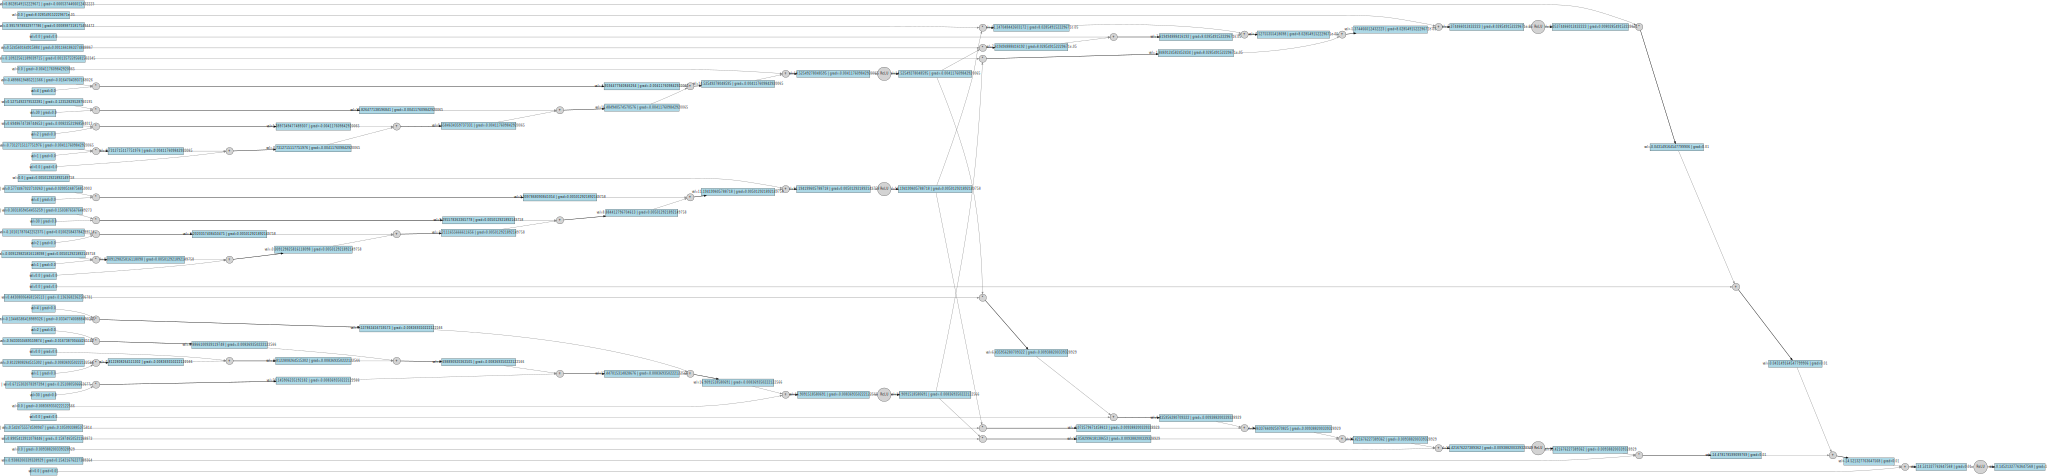

In [ ]:
# Testing the MLP

# Random seed so that in each execution the random values are same. This helps
# in maintaing consistency across multiple runs and thus we can test if the
# neural network is improving with each of our improvements.
random.seed(1)

# Config
# Here in_features = 4,
# first_layer = 3 neurons,
# second_layer = 2 neurons,
# third_layer = 3 neurons and thus out_features = 1
layer_sizes = [4, 3, 2, 1]

# Input and target
x = [1, 2, 30, 4] # Size equal to in_features
target = -0.5

# Forward pass to make prediction
model = MLP(layer_sizes)
predictions = model(x)
assert len(predictions) == 1
prediction = predictions[0]

# Compute loss
loss = mse_loss(prediction, target)
print(f'Prediction: {prediction}')
print(f'Target: {target}')
print(f'Loss: {loss}')

# Backward pass
model.zero_grad() # Call zero_grad on model and not on output.
prediction.backward()
visualize_computations(prediction)

---

## Apply optimization - SGD - Stochastic gradient descent

Since now we have the gradients computed, we can perform the optimization based on these gradients. We will perform SGD - stochastic gradient descent optimization we learned earlier. There are other types of optimizer as well like Adam or AdamW for LLMs, SGD with momentum for CNNs etc.

As we saw earlier, SGD optimization is
`model_param_i = model_param_i - learning_rate * grad_i` where grad_i is the derivate of loss w.r.t model_param_i.

Unlike `zero_grad`, we are not implementing the `sgd_optimization` within the model itself for flexibility and reusability. In addition, later on we will see that optimizer might have their own state. For example, SGD with momentum optimizer will maintain state to know the current momentum. So we want to keep it separate from the model. This also allows us the possibilty to change to different optimizer if needed.

In [ ]:
def sgd_optimization(parameters, learning_rate):
  for parameter in parameters:
    parameter.data = parameter.data - learning_rate * parameter.grad

## Testing MLP using Scalar

Now we have implemented MLP using Scalar. Let's test it out by running a training loop. For each trainging step in the loop, we will do forward pass, backward pass, optimize. Let's run it for same input 5000 times for testing using a learning rate of 0.0001

In [ ]:
def mlp_scalar_testing():
  random.seed(1)
  np.random.seed(1)

  ##### Neural network config
  layer_sizes = [4, 3, 2, 1] # [25, 12, 6, 1]
  learning_rate = 0.0001

  ##### Generate random inputs and targets
  num_samples = 1000
  # Random inputs with layer_sizes[0] features each
  inputs = [np.random.randn(layer_sizes[0]).tolist() for _ in range(num_samples)]
  # Random targets
  targets = [random.uniform(-1, 1) for _ in range(num_samples)]

  #### Create model
  model = MLP(layer_sizes)

  #### Training loop
  for i, (x, target) in enumerate(zip(inputs, targets)):
    # Forward pass to make prediction
    predictions = model(x)
    assert len(predictions) == 1
    prediction = predictions[0]

    # Compute loss
    loss = mse_loss(prediction, target)
    if i % 100 == 0: # Print loss every 500th step
      print(f'Loss: {loss}')

    # Backward pass
    model.zero_grad() # Call zero_grad on model and not on output.
    prediction.backward()

    # Optimize/Update parameters based on SGD
    sgd_optimization(model.parameters(), learning_rate)

start_time = time.perf_counter()
mlp_scalar_testing()
end_time = time.perf_counter()
print(f"\nTotal time: {(end_time - start_time) * 1000:.2f} milliseconds")

Loss: 0.5360071286148712
Loss: 1.1002998341262307
Loss: 0.12197053280959601
Loss: 0.14842206148020876
Loss: 0.6626027796385248
Loss: 3.880656292947666e-05
Loss: 0.17103864180866535
Loss: 0.7732942641281869
Loss: 0.587222305657115
Loss: 0.636526326525282

Total time: 191.55 milliseconds


# Optimization - Vector level vectorization - Vectorize within each neuron

Let's observe this code snippet from Neuron class.

```
    for w_i, x_i in zip(self.weights, x):
      output += w_i * x_i
```

We are doing the scalar computation one by one in for loop. This is inefficient. We can use vectors here. For example if entire weight parameter vector was defined in a single vector and similarly entire input x was a vector, then we could have done
```
output = self.weights.dot(x)
```

Here both self.weights and x vectors are of same size and we are doing dot multiplication which does element wise multiplication and then sum. This is what we wanted.

## Why vectors are efficient?

We saw that we can replace the above discussed weighted sum of the neuron's forward pass with vector instead of using scalars because it is more efficient? But why? Because we can numpy arrays as vectors. This has many benefits:
- Numpy arrays are defined in C (and not in python). So we avoid python overhead
- Also as its in C, its an array and not a python list. Thus they are stored in memory as contiguous blocks and thus we can benefit from cache efficiency
- Even though numpy doesn't run on GPUs and only support CPUs, it can use **SIMD(single instruction multiple data) power** of modern CPUs to perform multiple computations of the array in a single instruction.

---

## Vector class replacing Scalar class - Using numpy arrays

We defined Scalar class earlier to wrap python floats so that we can hold computation graph while forward pass and thus compute gradients in the backward pass. We will do the same for numpy arrays by defining a wrapper `Vector` class. We will basic functions like add, multiply, matrix multiply, power, subtract, relu, backward etc.

## Problem in using Vector class in neural network

If we replace the Scalar class implementation with Vector class in neural network, lets see what will happen:
- `MLP` forward passes gets `x` which is a list of floats (in python list form or in numpy array form). It will pass this `x` to the first layer's forward pass. First layer will pass this `x` to each one of its neurons.
- `Neuron`s of first layer will convert this `x` to a `Vector` of floats internally, and then do the `@` operation to compute the weighted sum + bias. It will output a single `Vector` instance as result.
- `NeuronLayer`'s first layer will get this `Vector` instance from each neuron, pack it in a python list of `Vector` list and return it to the `MLP`. `MLP` will pass this list of `Vector` to the second layer's forward pass. Second layer will pass this list of `Vector` to each of its neurons.
- `Neuron`'s of second layer will get this list of `Vector` as input which it will internally convert to `Vector` of `Vector` and then attemtps to perform the weights sum on this. You see the problem?
- `Neuron` of first layer does weighted sum on `Vector` of floats while the `Neuron` of second does weighted sum on `Vector` of `Vector`.


Let's understand this by example.
In first layer:
```
x = [1, 2, 3, 4] -> Converted to Vector([1, 2, 3, 4]) -> weighted sum computation.
```

In second case:
```
x = [Vector(0.5), Vector(0.6), Vector(0.1), Vector(0.7)] -> Converted to Vector([Vector(0.5), Vector(0.6), Vector(0.1), Vector(0.7)]) -> weighted sum computation
```

Second case breaks.

## Solution: Stack vectors

We should add one static method in the `Vector` class called `stack` which takes a list of `Vector`s with Vector containing scalar values to `Vector` of floats.
i.e. `Input=[Vector(0.5), Vector(0.6), Vector(0.1), Vector(0.7)]` gets converted to `Output=Vector([0.5, 0.6, 0.1, 0.7])`

In [ ]:
class Vector:
  def __init__(self, data, requires_grad=False, prev=None, label=None, op=None):
    # Note: data can be python list, tuple, numpy array, and all of these will be
    # converted to numpy array. In case of numpy array, it will be reused
    # instead of creating a new copy.
    #
    # Note: Size of data array will equal to in_features of neuron as this will
    # be used to represent entire weights parameters of neuron.
    self.data = np.asarray(data, dtype=np.float64)
    self.grad = np.zeros_like(self.data)
    self.requires_grad = requires_grad
    self._prev = prev or []
    self._backward = lambda: None

    # For visualisation purposes
    self._label = label
    self._op = op

  def __repr__(self):
    return f'{self.data}'

  def __add__(self, other):
    # Assumption: For education purposes, we are assuming that we get inputs in
    # exact dimensions and thus we dont need to handle broadcasting.
    other = other if isinstance(other, Vector) else Vector(other)
    out = Vector(self.data + other.data, prev=(self, other), op='+')
    out.requires_grad = self.requires_grad or other.requires_grad

    def _compute_grad(x):
      # grad_x = grad_out * dout/dx = grad_out
      if not x.requires_grad:
        return

      # Reduce dimensions of out.grad to match it to the dimensions of x. This
      # is done by summing the rows which makes sense as sum of all out.grad
      # contributes to grad of x.
      #
      # For example, if out.grad = (m, n, p) and x.grad is (p,). In first
      # iteration, this for loop reduce dimension from (m, n, p) to (n, p) by
      # summing over axis 0 which is all m rows becomes 1 row. In 2nd iteration,
      # it reduces it further to (p,) and thus matching to dimensions of x.
      grad = out.grad
      ndims_added = grad.ndim - x.data.ndim
      for i in range(ndims_added):
        grad = grad.sum(axis=0)

      # Usually just doing above is sufficient but lets take a case where
      # out.grad.shape = (m,n,p) and x shape is (1,p) or (1,1,p) Now above
      # scenario will not work.
      # For the case of (m,n,p) and (1,p), the above logic will atleast make it
       # (n,p) and (1,p). So we are sure that atleast the dimensions match.
      # Overall we left with cases of same dimensions like: (m,n,p) + (1,1,p)
      # OR (n,p) + (1,p).
      # In such cases we will iterate again and using same sum thing, make
       # (m,n,p) to (1,1,p) to match it with (1,1,p). Similarly for (n,p) we
       # will make it (1,p) to match it with (1,p)
      for i, (grad_dim, x_dim) in enumerate(zip(grad.shape, x.data.shape)):
        if x_dim == 1 and grad_dim > 1:
          grad = grad.sum(axis=i, keepdims=True)
      x.grad += grad

    def _backward():
      # x = self, y = other, out = x + y
      # grad_x = grad_out * dout/dx = grad_out
      # grad_y = grad_out * dout/dy = grad_out
      _compute_grad(self)
      _compute_grad(other)

    if out.requires_grad:
      out._backward = _backward
    return out

  def __matmul__(self, other):
    other = other if isinstance(other, Vector) else Vector(other)
    out = Vector(self.data @ other.data, prev=(self, other), op='@')
    out.requires_grad = self.requires_grad or other.requires_grad

    def _compute_grad_x(x, y):
      # grad_x = grad_out @ y.T
      if not x.requires_grad:
        return

      if y.data.ndim == 1:
        # y is 1D
        if x.data.ndim == 1:
          # Both 1D (dot product)
          x.grad += out.grad * y.data
        else:
          # x is 2D, y is 1D: (m,n) @ (n,) -> (m,)
          # grad_x: (m,1) @ (1,n) -> (m,n)
          grad_out_col = out.grad.reshape(-1, 1)
          y_row = y.data.reshape(1, -1)
          x.grad += grad_out_col @ y_row
      else:
        # y is 2D
        if x.data.ndim == 1:
          # x is 1D, y is 2D: (n,) @ (n,m) -> (m,)
          # grad_x: (m,) @ (m,n) -> (n,)
          x.grad += out.grad @ y.data.T
        else:
          # Both 2D: (k,n) @ (n,m) -> (k,m)
          # grad_x: (k,m) @ (m,n) -> (k,n)
          x.grad += out.grad @ y.data.T

    def _compute_grad_y(x, y):
      # grad_y = x.T @ grad_out
      # We need separate methods as grad_x = grad_out @ y.T but grad_y = x.T @ grad_out.
      # To reuse the same method we can do something like grad_y = (grad_out.T @ x.T).T but that will unnecessary complicate computations. Better is to create another method.
      if not y.requires_grad:
        return

      if x.data.ndim == 1:
        # x is 1D
        if y.data.ndim == 1:
          # Both 1D (dot product)
          y.grad += out.grad * x.data
        else:
          # x is 1D, y is 2D: (n,) @ (n,m) -> (m,)
          # grad_y: (n,1) @ (1,m) -> (n,m)
          x_col = x.data.reshape(-1, 1)
          grad_out_row = out.grad.reshape(1, -1)
          y.grad += x_col @ grad_out_row
      else:
        # x is 2D
        if y.data.ndim == 1:
          # x is 2D, y is 1D: (m,n) @ (n,) -> (m,)
          # grad_y: (n,m) @ (m,1) -> (n,1) -> (n,)
          grad_y = x.data.T @ out.grad.reshape(-1, 1)
          y.grad += grad_y.ravel()
        else:
          # Both 2D: (k,n) @ (n,m) -> (k,m)
          # grad_y: (n,k) @ (k,m) -> (n,m)
          y.grad += x.data.T @ out.grad

    def _backward():
      # For matrix multiplication out = x @ y where x is (m,n), y is (n,p) and
      # out is (m,p):
      # grad_x = grad_out @ y.T i.e. (m,p) @ (p,n) = (m,n)
      # grad_y = x.T @ grad_out i.e. (n,m) @ (m,p) = (n,p)

      _compute_grad_x(self, other)
      _compute_grad_y(self, other)

    if out.requires_grad:
      out._backward = _backward
    return out

  def __mul__(self, other):
    # Assumption: For education purposes, we are assuming that we get inputs in
    # exact dimensions and thus we dont need to handle broadcasting.
    other = other if isinstance(other, Vector) else Vector(other)
    out = Vector(self.data * other.data, prev=(self, other), op='*')
    out.requires_grad = self.requires_grad or other.requires_grad
    def _backward():
      if self.requires_grad:
        self.grad += out.grad * other.data
      if other.requires_grad:
        other.grad += out.grad * self.data
    if out.requires_grad:
      out._backward = _backward
    return out

  def backward(self):
    # to be called by the final output only i.e. by the loss variable.
    # Calls backward for all parameters in reveresed topological sorted order

    # Skip if requires_grad is false.
    if not self.requires_grad:
      return

    # dloss/dloss = 1.0
    self.grad = np.ones_like(self.data)

    # topological sort
    visited = set()
    topo = []
    def _topo_sort(node):
      if node in visited or not node.requires_grad:
        return
      visited.add(node)
      for prev_node in node._prev:
        _topo_sort(prev_node)
      topo.append(node)
    _topo_sort(self)

    # Call backward in reverse topological sort order
    for node in reversed(topo):
      node._backward()

  def zero_grad(self):
    # For testing purposes only
    # Not efficient for production as it sets zero for computed variables also
    # which doens't make sense in production models as computed variables of
    # previous training step are not present in the current training step. Only
    # model parameters are reused across training steps.
    visited = set()
    def _zero_grad(node):
      if node in visited:
        return
      visited.add(node)
      node.grad = np.zeros_like(node.data)
      for prev_node in node._prev:
        _zero_grad(prev_node)
    _zero_grad(self)

  def __sub__(self, other):
    return self + (other * -1)

  def __pow__(self, k: float):
    # Assumption: k is python float and not of `Vector` instance. Currently we
    # just  need x^k support and not x^y support.
    #
    # x = self, out = x**k
    # dloss/dx = dloss/dout * dout/dx = grad_out * k * x**(k-1)
    out = Vector(self.data**k, prev=(self,), op='pow')
    out.requires_grad = self.requires_grad
    def _backward():
      if self.requires_grad:
        self.grad += out.grad * k * self.data**(k-1)
    if out.requires_grad:
      out._backward = _backward
    return out

  def mean(self):
    # x = self, out = mean(x), grad_x = grad_out * dmeanx/dx = grad_out/n
    out = Vector(np.mean(self.data), prev=(self,), op='mean')
    out.requires_grad = self.requires_grad

    def _backward():
      if self.requires_grad:
        # len(self.data) returns outer size but self.data.size returns number of
        # elements in the matrix.
        self.grad += np.ones_like(self.data) * out.grad / self.data.size

    if out.requires_grad:
      out._backward = _backward
    return out

  def sum(self):
    out = Vector(np.mean(self.data), prev=(self,), op='sum')
    out.requires_grad = self.requires_grad

    def _backward():
      if self.requires_grad:
        self.grad += np.ones_like(self.data) * out.grad / self.data.size

    if out.requires_grad:
      out._backward = _backward
    return out

  def relu(self):
    # out = np.maximum(0, x)
    out = Vector(np.maximum(0, self.data), prev=(self,), op='ReLU')
    out.requires_grad = self.requires_grad
    def _backward():
      if self.requires_grad:
        self.grad += out.grad * np.where(self.data > 0, 1.0, 0)
    if out.requires_grad:
      out._backward = _backward
    return out

  def leaky_relu(self, alpha=0.01):
    # Allow small negative values to testing and eduction purposes. Not to be used in real models.
    out = Vector(np.where(self.data > 0, self.data, self.data * alpha), prev=(self,), op='ReLU')
    out.requires_grad = self.requires_grad
    def _backward():
      if self.requires_grad:
        self.grad += out.grad * np.where(self.data > 0, 1.0, alpha)

    if out.requires_grad:
      out._backward = _backward
    return out

  @property
  def T(self):
    out = Vector(self.data.T, prev=(self,), op='T')
    out.requires_grad = self.requires_grad

    def _backward():
      if self.requires_grad:
        # Gradient of transpose is just transpose of gradient!
        self.grad += out.grad.T

    if out.requires_grad:
      out._backward = _backward

    return out

  @staticmethod
  def stack(vectors):
    # x = vectors = [vector1, vector2, vector3], out = Vector([1, 2, 3])
    # grad_x_i += out[i].grad
    for vector in vectors:
        assert vector.data.size == 1, f"Expected scalar, got shape {vector.data.shape}"
    out = Vector([vector.data.item() for vector in vectors], prev=tuple(vectors), op='stack')
    out.requires_grad = any(vector.requires_grad for vector in vectors)
    def _backward():
      for i, vector in enumerate(vectors):
        if vector.requires_grad:
          vector.grad += out.grad[i]
    if out.requires_grad:
      out._backward = _backward
    return out


x: [1. 2. 3. 4.]
w: [0.1 0.2 0.3 0.4]
b: 0.5
Prediction: 3.5
Target: 3
Loss: 0.25

x: [1. 2. 3. 4.]
w: [0.1 0.2 0.3 0.4]
b: 0.5
Prediction: 3.5
Target: 3
Loss: 0.25


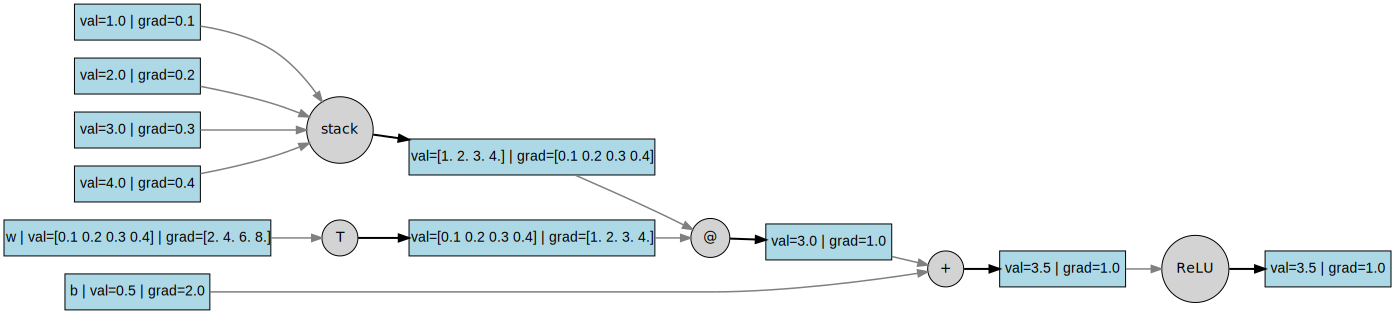

In [ ]:
# Basic testing

# Inputs and targets
x = Vector([1, 2, 3, 4], label='x', requires_grad=True,)
target = 3

# Parameters
w = Vector([0.1, 0.2, 0.3, 0.4], requires_grad=True, label='w')
b = Vector(0.5, requires_grad=True, label='b')

# Output
prediction = x @ w.T + b
prediction = prediction.relu()
loss = mse_loss(prediction, target)
print(f'x: {x}')
print(f'w: {w}')
print(f'b: {b}')
print(f'Prediction: {prediction}')
print(f'Target: {target}')
print(f'Loss: {loss}\n')
loss.backward()
visualize_computations(prediction)

# Try out the stack operation
x = [Vector(1, requires_grad=True), Vector(2, requires_grad=True), Vector(3, requires_grad=True), Vector(4, requires_grad=True)]
x = Vector.stack(x)
prediction = x @ w.T + b
prediction = prediction.relu()
loss = mse_loss(prediction, target)
print(f'x: {x}')
print(f'w: {w}')
print(f'b: {b}')
print(f'Prediction: {prediction}')
print(f'Target: {target}')
print(f'Loss: {loss}')
loss.backward()
visualize_computations(prediction)


## Reimplementing neural network - Using Vector class

We will reimplement the neural network which will look very similar to earlier but using Vector class instead of Scalar class.

Key differences:
- `NNModule`: Defined zero_grad as np.zeros instead of 0.0
- `Neuron`: Uses Vector class instead of Scalar improving the efficiency of weighted sum computation.
- `NeuronLayer`: Uses `stack` operation to convert [Vector(1), Vector(2), Vector(3)] to Vector([1, 2, 3]) so that next layers can use inputs properly.
- `MLP`: No changes in MLP class.

In [ ]:
class NNModule:
  def parameters(self):
    return []

  def zero_grad(self):
    for parameter in self.parameters():
      # Here parameter is a Vector instance
      parameter.grad = np.zeros_like(parameter.data)

class Neuron(NNModule):
  def __init__(self, in_features):
    self.weights = Vector([random.uniform(-1, 1) for _ in range(in_features)], requires_grad=True, label=f'w_{id(self)}')
    self.bias = Vector(0.0, requires_grad=True, label=f'b_{id(self)}')

  def __call__(self, x):
    # x is a Vector of floats or list of floats or numpy array of floats
    x = x if isinstance(x, Vector) else Vector(x) # keeping requires_grad to false for inputs.
    assert len(x.data) == len(self.weights.data)
    out = x @ self.weights.T + self.bias
    out = out.leaky_relu()
    # print(f'neuron_out: {out}')
    return out

  def parameters(self):
    return [self.weights, self.bias]

class NeuronLayer(NNModule):
  def __init__(self, in_features, out_features):
    self.neurons = [Neuron(in_features) for _ in range(out_features)]

  def __call__(self, x):
    out = [neuron(x) for neuron in self.neurons]
    # Important: we are stacking vectors to get Vector([1, 2, 3]) from [Vector(1), Vector(2), Vector(3)]
    out = Vector.stack(out)
    # Note: Not doing fancy things like layer normalization for now.
    return out

  def parameters(self):
    params = []
    for neuron in self.neurons:
      params.extend(neuron.parameters())
    return params

# This doesnt change
class MLP(NNModule):
  def __init__(self, layer_sizes):
    self.layers = [
        NeuronLayer(in_size, out_size)
        for in_size, out_size in zip(layer_sizes[:-1], layer_sizes[1:])
      ]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
      # print(f'x new: {x}')
    # Not doing fancy things like
    return x

  def parameters(self):
    params = []
    for layer in self.layers:
      params.extend(layer.parameters())
    return params

Prediction: [-0.14521328]
Target: [-0.5]
Loss: [0.12587362]


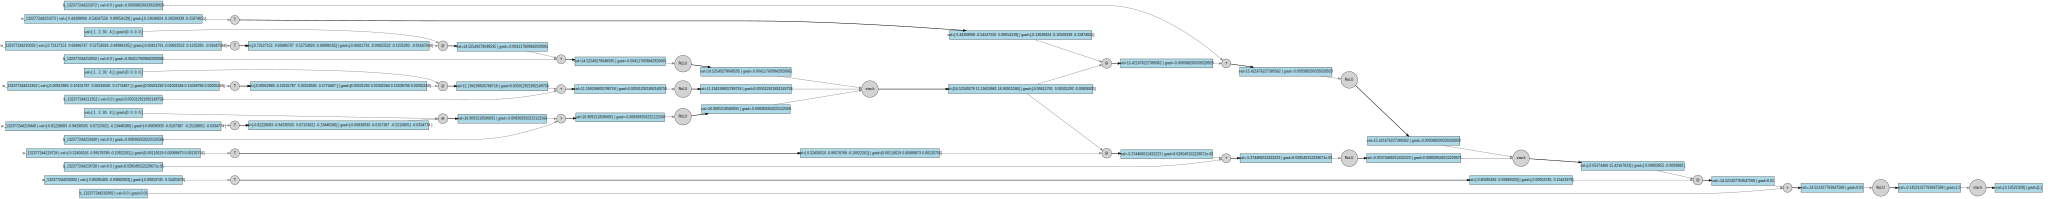

In [ ]:
# Testing the MLP

# Random seed so that in each execution the random values are same. This helps
# in maintaing consistency across multiple runs and thus we can test if the
# neural network is improving with each of our improvements.
random.seed(1)

# Config
# Here in_features = 4,
# first_layer = 3 neurons,
# second_layer = 2 neurons,
# third_layer = 3 neurons and thus out_features = 1
layer_sizes = [4, 3, 2, 1]

# Input and target
x = [1, 2, 30, 4] # Size equal to in_features
target = Vector([-0.5])

# Forward pass to make prediction
model = MLP(layer_sizes)
prediction = model(x)
assert len(prediction.data) == 1 # Because last entry in last_sizes is 1.

# Compute loss
loss = mse_loss(prediction, target)
print(f'Prediction: {prediction}')
print(f'Target: {target}')
print(f'Loss: {loss}')

# Backward pass
model.zero_grad() # Call zero_grad on model and not on output.
prediction.backward()
visualize_computations(prediction)

## Testing MLP using Vector

- As now we have implemented MLP using Vector. Let's test it out by running a training loop. For each training step in the loop, we will do forward pass, backward pass, optimize.
- We need to increase the layer sizes so that we can see the effect of vectorization. For very small vectors of 3,4 size, we might see vectorization performing even worse than scalar.
- When we ran the tests with similar settings(increased layer sizes) for both scalar implementation and vector implementation, we got `22339.25 ms` for scalar and `1804.09 ms` for vector one which is 12.4 times faster for the given settings.
- We also made sure that loss calculations didn't change with this vectorization to ensure code accuracy.


In [ ]:
# Similar method as mlp_scalar_testing with minimal changes
def mlp_vector_testing(batch_size=1):
  random.seed(1)
  np.random.seed(1)

  ##### Neural network config
  layer_sizes = [25, 12, 6, 1]
  learning_rate = 0.0001

  ##### Generate random inputs and targets
  num_samples = 1000
  # Random inputs with layer_sizes[0] features each
  inputs = [np.random.randn(layer_sizes[0]) for _ in range(num_samples)]
  # Random targets
  targets = [np.array([random.uniform(-1, 1)]) for _ in range(num_samples)]

  if batch_size > 1:
    # Create batches
    batched_inputs = []
    batched_targets = []
    for i in range(0, num_samples, batch_size):
      batch_inputs = inputs[i:i+batch_size]
      batch_targets = targets[i:i+batch_size]

      # Stack into matrices
      batched_inputs.append(np.array(batch_inputs))  # Shape: (batch_size, layer_sizes[0])
      batched_targets.append(np.array(batch_targets))  # Shape: (batch_size,)
    inputs = batched_inputs
    targets = batched_targets

  #### Create model
  model = MLP(layer_sizes)

  #### Training loop
  for i, (x, target) in enumerate(zip(inputs, targets)):
    # Forward pass to make prediction
    prediction = model(x)
    assert len(prediction.data) == batch_size

    # Compute loss
    loss = mse_loss(prediction, target)
    if i % (100 / batch_size) == 0:
      # print(f'Prediction: {prediction}, Target: {target}, Loss: {loss}')
      # print(f'Predicton: {prediction.data}')
      # print(f'Target: {target}')
      print(f'Loss: {loss.data[0]}')

    # Backward pass
    model.zero_grad() # Call zero_grad on model and not on output.
    prediction.backward()

    # Optimize/Update parameters based on SGD
    sgd_optimization(model.parameters(), learning_rate)

start_time = time.perf_counter()
mlp_vector_testing()
end_time = time.perf_counter()
print(f"\nTotal time: {(end_time - start_time) * 1000:.2f} milliseconds")

Loss: 7.029810891968221
Loss: 1.324790965579314
Loss: 0.11658777748784199
Loss: 0.1440859214998677
Loss: 0.6626020333595882
Loss: 0.07674494312015022
Loss: 0.17566876858076402
Loss: 0.7441552170029175
Loss: 0.5197354178410911
Loss: 0.6480027486266849

Total time: 2116.23 milliseconds


# Optimization - Matrix level vectorization - parallelizing neuron computations of same layer

- We saw that vectorization helped in computing the neuron's computation quickly but we are computing each neuron of same layer sequentially in `NeuronLayer`'s forward pass.

```
# NeuronLayer forward pass
def __call__(self, x):
  out = [neuron(x) for neuron in self.neurons]
  out = Vector.stack(out)
  return out
```

- `[neuron(x) for neuron in self.neurons]` is the culprit here which is causing neuron computation sequentially.
- Our first though to achieve parallelism is to use `ThreadPoolExecutor` or `ProcessPoolExecutor` but it doesn't give a lot of benefits for large network because of limited thread, limited processes, Python's global interpreter lock(GIL) which uses only 1 thread to execute python code at a time etc.
- Better solution here is use **Vectorization**. Yes, we can use vectorization at this level also.
- What we can do is skip the `Neuron` class entirely and define just the `NeuralLayer` which instead of calling `out_features` neurons each containing weights vector of `(in_features,)` and bias vector of `(1)`, we have a single weights vector of `(out_features, infeatures)` and single bias vector of `(out_features,)` within the neural layer.
- We define the weight sum computation within neural layer. i.e. `out = w @ x + b` where x is w is `(out_features, infeatures)`, `(in_features,)`, b is `(out_features,)`, thus it will give us out of `(out_features,)`
- We then apply `relu` activation on this out vector which performs element wise `relu` to give us activate out of `(out_features,)`.
- One side benefit of doing this vectorization is that we no longer need to do `stack` operation as we are getting the output in correct format fromt the neural layer.
- This vectorization works because in matric multiplcations, each row of the first matrix gets multipled by each column of the second matrix. Thus rows of first matrix don't interfer with the computation of each other. This is key. We wanted that neurons of same layer don't interfere with each other. That's the reason each row of our weights matrix represent the weights of an individual neuron.

On comparing the old vectorization(of neuron's computation) vs new vectorization(neural layer parallelization) we saw the time reduction from 1532 ms to 256 ms.


In [ ]:
class NeuronLayer(NNModule):
  def __init__(self, in_features, out_features):
    self.weights = Vector(
        # Note: Generating weights in the same sequential order as individual
        # neurons case to ensure losses are same. Otherwise, commented is the
        # better way:
        # np.random.uniform(-1, 1, (out_features, in_features)),
        np.array([
            [random.uniform(-1, 1) for _ in range(in_features)]
            for _ in range(out_features)
        ]),
        requires_grad=True,
        label=f'w_{id(self)}'
      )
    self.bias = Vector(
        np.zeros(out_features),
        requires_grad=True,
        label=f'b_{id(self)}'
      )

  def __call__(self, x):
    x = x if isinstance(x, Vector) else Vector(x)
    # print(f'weights_shape: {self.weights.data.shape}')
    # print(f'bias_shape: {self.bias.data.shape}')
    # print(f'x_shape: {x.data.shape}')
    out = x @ self.weights.T + self.bias
    # print(f'layer_out: {out}\n')
    out = out.leaky_relu()
    return out

  def parameters(self):
    return [self.weights, self.bias]

In [ ]:
start_time = time.perf_counter()
mlp_vector_testing()
end_time = time.perf_counter()
print(f"\nTotal time: {(end_time - start_time) * 1000:.2f} milliseconds")

Loss: 7.029810891968226
Loss: 1.324790965579314
Loss: 0.11658777748784199
Loss: 0.1440859214998677
Loss: 0.6626020333595882
Loss: 0.07674494312015016
Loss: 0.17566876858076402
Loss: 0.7441552170029175
Loss: 0.5197354178410911
Loss: 0.6480027486266849

Total time: 199.32 milliseconds


## Optimization: Batching

- Let's take example where MLP has `layer_sizes => [3, 8, 4, 1]`
- In each training loop, we pass an input vector of size 3(first index) and get a vector of size 1(last index) as output. But at the end, we are passing only 1 input vector at a time.
- We already know that in matrix multiplication, rows of first matrix doens't interfere with computations of each other, and that was the reason to vectorize/parallelize all the parameters of a neuron layer in a single matrix. We can use that same concept and say that instead of passing 1 input vector at a time, we will pass 10 input vectors at a time with each input vector of size 3.
- Thus first layer will get input vector (10,3), weight matrix stays same of (8,3) - 8 neurons and 3 inputs, bias will be same as (1,8) and it outputs (10,8)
- Second layer gets (10,8) as input, weight matrix stays same of (4,8) - 4 neurons and 8 inputs, bias will be same as (1,4) and it outputs (10,4)
- Third layer will get (10,4) as input, weight matrix stays same of (1,4) - 1 neuron and 4 inputs, bias will be same as (1,1) and it outputs (10,1)
- Let's see if the dimensions still match for our equation:
```
out = x @ self.weights.T + self.bias

Let's check it for second layer:
x = (10,8)
self.weights = (4,8)
self.bias = (1,4)
x @ self.weights.T
= (10,8) @ (4,8).T + (1,4)
= (10,8) @ (8,4) + (1,4)
= (10,4) + (1,4)
= (10,4)
=== MATCH
```
- We don't need a new neural network implementation to make it work but just to make some changes in the Vector class's add and matmul methods as they will get somewhat complicated to ensure gradienst are computed correctly for different usecase.
- When we ran this variant with batching, we got results in 46 in compare to earlier 250 ms.
- **Why not full training data as one batch**: Because:
  - Huge memory usage for large datasets
  - Slow convergence
  - Gets stuck in local minima




In [ ]:
start_time = time.perf_counter()
mlp_vector_testing(batch_size=10)
end_time = time.perf_counter()
print(f"\nTotal time: {(end_time - start_time) * 1000:.2f} milliseconds")

# Loss: [7.02981089]
# Loss: [1.32479097]
# Loss: [0.11658778]
# Loss: [0.14408592]
# Loss: [0.66260203]
# Loss: [0.07674494]
# Loss: [0.17566877]
# Loss: [0.74415522]
# Loss: [0.51973542]
# Loss: [0.64800275]

Loss: [7.02981089]
Loss: [1.32478579]
Loss: [0.11658779]
Loss: [0.14408593]
Loss: [0.66260203]
Loss: [0.07673758]
Loss: [0.17566882]
Loss: [0.74415555]
Loss: [0.51973545]
Loss: [0.64800268]

Total time: 38.06 milliseconds


---

# Full MLP to classify house prices

So we have seen back propagation, neural network implementation using that back propagation, and we sped things up using vectorization. We tests these neural networks with random input samples keep same seed for comparison. But we didn't had any task in mind while writing this neural network. We were not trying to acheive anything.

Let's now write an end to end MLP along with its training, evaluation, testing with a prediction task in mind. This will give is end to end idea of what components and structure are needed.

## Prediction task - Predict house prices
Given three input features - sqft, bedrooms and location_score; our model has to predict the price of the house.

Input features:
- sqft: Area of house in sqft: Example: 1200, 1800 etc.
- bedrooms: Number of bedrooms in the house: Example: 2, 3, 4, 1
- location_score: 0-10 scale (0=bad location, 10=great location). Example: 5, 7, 3, 8

Output feature:
- price: in multiple of \$1000: Example: 250(\$250K), 380, 500

---

## Step 1: Gather training dataset

First step is to gather training data i.e.
- inputs to the model to be used for training, and
- the target house price which we expect from the model.

Ideally we would get this data from some dataset but for this task lets create it synthetically.


In [ ]:
# ============================================
# 1. GATHER TRAINING DATA
# ============================================

# Training data - Input features
# Simple synthetic dataset: [sqft, bedrooms, location_score]
# location_score: 0-10 scale (0=bad location, 10=great location)
X_train = np.array([
    [1200, 2, 5],   # 1200 sqft, 2 bed, avg location
    [1800, 3, 7],   # 1200 sqft, 2 bed, avg location
    [900, 1, 3],    # 900 sqft, 1 bed, poor location
    [2200, 4, 8],   # 2200 sqft, 4 bed, great location
    [1500, 3, 6],   # 1500 sqft, 3 bed, good location
    [1100, 2, 4],   # 1100 sqft, 2 bed, avg location
    [2500, 4, 9],   # 2500 sqft, 4 bed, excellent location
    [800, 1, 2],    # 800 sqft, 1 bed, poor location
])

# Target - Target price in $1000 for each of X.
y_train = np.array([250, 380, 180, 520, 310, 220, 600, 150])

# Test data
X_test = [
    [1600, 3, 6],   # 1600 sqft, 3 bed, good location
    [2000, 3, 8],   # 2000 sqft, 3 bed, great location
    [1000, 2, 4],   # 1000 sqft, 2 bed, avg location
]

assert len(X_train) == len(y_train)

---

## Step 2: Scaling the dataset

In our training data we can see that numbers in the array are very different from each other. For example 1200 number of sqft is very large from 2 number of bedrooms. This can be problematic because if you remember correctly, these numbers are used in weighted sum for neuron computation and thus larger number will have more say overall and thus making sqft input feature more important than bedroom size and location_score input features which will be incorrect. Thus this kind of mismatch brings training instability.

**Incorrect way:**

To solve this, we scale the dataset by normlizaing it i.e. bringing each number in [0,1]. You might think that one way to do that is to divide each number by the sum of the array. For example: `[1200, 2, 5] / 1207 = [0.994200497, 0.00165700083, 0.00414250207]` but this will also cause training instability. Why? Because the problem still remains, other smaller values kinda diminished to 0 and only thing which reamins is sqft near to 1.

**Correct way - Min-max scaling:**

We scale the features by normalizing w.r.t their own values. i.e. `(sqft[i] - sqft_min)/(sqft_max - sqft_min)`. This way all features will be in range of [0,1] and will be in similar range.

**Scaling vs Normalization:**

Scaling means transforming data and normalization means normalizing the data. Both are kinda same thing in what we are trying to do. But in the context of model training, we use the wordings in different sense.
- When we normalize a particular input/output feature(say sqft), then we say it **Scaling**.
- On the other when we normalize the input itself across its features(like a row of input [1200, 2, 5]), then we say it **Normalization**.

**Scaling both input and output features:**

Not only we should scale the input dataset, but we should also scale the output dataset as well. This is because, output features can be more than 1 and thus they can have same problem, one feature's value can be totally different from the other.

But if we scale the output feature, then won't we get scaled prediction of the ouput features? Yes. So, we need to transform the prediction to the original form. i.e. `scaled_predicted_price*(price_max - price_min) + price_min`.

**Limitations of Min-max scaling:**

- During training, if outliers are present, then training is not stable. For example if normally houses are around 1500 sqft but in dataset there is one outlier with 200000 sqft. As this becomes max, most of houses will have values crushing to zero in [0,1] range.
- During testing, if we see values outside the min and max range of the training dataset, the approach will fail.

**Min-Max scaling with Clipping:**

If values go out of min, max range we clip them to be in with range. i.e. any values less than min will be min and any value greater than max will be max.
```
scaled = (in_feature[i] - min) / (max - min)
scaled = np.clip(normalized, 0, 1)  # clip to [0,1]
```
- During training, the problem remains as we disucssed.
- During testing, if we see value outside min,max range, we will not fail but we will give same value as max. So, prediction will not be correct for these kind of values.

**Standarization - (Z-score scaling):**

We can use standardization.

```
(in_feature[i] - mean) / std
```
Here `mean = sigma(xi) / N`, and `std = sqrt(sigma((xi - mean)^2) / N)`.

- During training this approach is less sensitive to outliers, and is thus way better approach than min-max scaling. Rather than getting values crushing to zero for normal house sqft, we will see better values.
- During training, even though it handles outliers problem somewhat, this still is a big problem to model to cause training instability.
- During testing, if we see a value which is outside min,max range, the model will extrapolate from the max value it has seen. So it will predict but it might not be correct most probably it will underpredict (if seeing a higher value than max)
- We can use this approach for values where we know they are well distributed. Example: age of a person, location_score etc. but not good for values which might have outlier like house price, house sqft etc.

**Robust scaling:**

This approach skips outliers altogether as it uses median and percentiles.

```
(in_feature[i] - median) / IQR
```

where Where IQR = Q3 - Q1 (interquartile range)
median = value in center when values are sorted.
Q1 = value in center of lower half when values are sorted
Q2 = value in center of higher half when values are sorted.

- During training, it handles outliers pretty well as its precentile based. Training is very stable.
During testing, if you get a value whichh is outside the usual percentile ranges, prediction will be worse. Worse than standarization.

**Log Transform + Standardization:**

First take log of all values using `log(1+x)`, and then use standardization on those:

```
log_feature = np.log1p(in_feature[i])  # log(1+x)
normalized = (log_feature - mean_log) / std_log
```

Here log_feature = log(1+in_feature[i])
mean_log = mean of all log_features
std_log = std of all log_features

- Taking log first helps by a) compressiong the range and b) spreading the data better and thus making distribution more symmetric even with outliers.
- During training, thus model is less sensitive to outliers.
- During testing, model can do better prediction for values outside the range model has seen during training as the extrapolation happens in compressed range and thus will be better.

In [ ]:
# ============================================
# 1. SCALING TRAINING DATA
# ============================================

# For the implementaion, we will use simple min max scaler.
class MinMaxScaler:
  def __init__(self, eps=1e-8):
    self.mins = None
    self.maxs = None
    self.ranges = None
    self.eps = eps

  def fit(self, data):
    # data = (batch, d_model)
    # As scaling is done on features so setting axis=0 to squash all the rows.
    self.mins = np.min(data, axis=0, keepdims=True) # (1, d_model)
    self.maxs = np.max(data, axis=0, keepdims=True) # (1, d_model)
    self.ranges = self.maxs - self.mins # (1, d_model)

    # For constant features, set this to 1 to avoid amplifying noise
    self.ranges[self.ranges < self.eps] = 1

  # Can be called during training or inference.
  def transform(self, data):
    # data = (batch, d_model), self.mins = (1, d_model),
    # self.ranges = (1, d_model), result = (batch, d_model)
    return (data - self.mins) / self.ranges

  # Should be called during training only.
  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

  # Should be called to convert scaled prediction to original form.
  def inverse_transform(self, scaled_data):
    return (scaled_data * self.ranges) + self.mins

In [ ]:
# Scaled data
X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)

---

## Step 3: MLP Model

Let's have three layers in the MLP
- First layer takes 3 input features(sqft, bedrooms, location_score) and returns say 8 output features
- Second layer takes 8 input features(outputs of 1st layer) and returns say 4 output features.
- Third layer(output layer) takes 4 input features(outputs of 2nd layer) and returns 1 output feature(representing price).
- So we can say that model takes vector of sqft, bedrooms and location_score as input and returns predicted price of the house.

**He initialization:**
- With this step, lets also redefine the NeuronLayer class such that the weight initialization is according to `He initialization` given that we are using `ReLU` and thus to keep `variance` across layers same, `He initialization` makes more sense. Why?

```
std_w = standard deviation of weight
So, var_w = std_w^2 (by definition)

std_in = standard deviation of input
var_in = std_in^2

input = N(0,1).. i.e. assuming that input is standardized/normalized/scaled such that mean is 0 and std is 1.

output = sigma(input * weight)
So var_out = input_size*var_in*var_w = n * std_in^2 * std_w^2
After applying ReLU, on average half of them will return 0
So, var_out = var_out / 2 = n/2 * std_in^2 * std_w^2

For training stability:
var_in should be equal to var_out
n/2 * std_in^2 * std_w^2 = std_in^2
So std_w = sqrt(2/n)

So weights should be initialized to N(0, std_w) i.e. N(0, sqrt(2/n)).
```

This maintaince of variance allows gradients not to bxplode or vanish. This is also one the reason why in attention mechansim also, we apply similar scaling.

In [ ]:
# ============================================
# 3. MLP MODEL
# ============================================

np.random.seed(5)
random.seed(5)

class NeuronLayer(NNModule):
  def __init__(self, in_features, out_features):
    self.weights = Vector(
        np.random.randn(out_features, in_features) * np.sqrt(2.0 / in_features),
        requires_grad=True,
        label=f'w_{id(self)}'
      )
    self.bias = Vector(
        np.zeros(out_features),
        requires_grad=True,
        label=f'b_{id(self)}'
      )

  def __call__(self, x):
    x = x if isinstance(x, Vector) else Vector(x)
    out = x @ self.weights.T + self.bias
    out = out.leaky_relu()
    return out

  def parameters(self):
    return [self.weights, self.bias]

model = MLP([3, 8, 4, 1])
print("Model created!")

Model created!


---

## Step 4: Define Loss function

Lets use mean squared error loss function

In [ ]:
# ============================================
# 4. DEFINE LOSS FUNCTION
# ============================================

def mse_loss(predictions, targets):
  squared_error = (predictions - targets)**2
  return squared_error.mean()

# Example: One output layer
# loss = mse_loss(Vector([[2, 3.5, 7, 3], [5, 2, 6, 1]], requires_grad=True), Vector([[1, 5, 2, 2], [3, 0.5, 6, 1.5]]))
# loss.zero_grad()
# loss.backward()
# print(loss)
# visualize_computations(loss)

---

## Step 5: Define optimizer

Instead of using methods, lets use better way which is to define class for SGD Optimizer. This allows us to later on add states in it. For example, Adam Optimize needs momentum and velocity states to be maintained.

In [ ]:
# ============================================
# 5. SGD Optimizer
# ============================================

class SGDOptimizer:
  def __init__(self, parameters, learning_rate):
    print(f'Parameter count: {len(parameters)}')
    self.parameters = parameters
    self.learning_rate = learning_rate

  def zero_grad(self):
    for parameter in self.parameters:
      parameter.grad = np.zeros_like(parameter.data)

  def step(self):
    for parameter in self.parameters:
      parameter.data -= self.learning_rate * parameter.grad

In [ ]:
#### Optimizer Config
learning_rate = 0.1

#### Optimizer
optimizer = SGDOptimizer(model.parameters(), learning_rate)

Parameter count: 6


---

## Step 6: Define Training loop
- Training loop where we use epochs, batch size etc
- For each epoch, we shuffle the indicies so that the order and the batch mixup changes
- We have moved gradient reset and parameter update to optimizer. Only the backward computation stays with the Value vector via calling it on loss variable.
- Using the mse_loss function
- Using the SGD optimizer to update model parameters.

**Note:**: This model doesn't converge because of small dataset, small batch, gradient vanishing etc but is good for understanding how things work end to end.

In [ ]:
# ============================================
# 6. TRAINING LOOP
# ============================================

#### Config
epochs = 200
batch_size = 2

#### Training loop
len_train = len(X_train_scaled)
assert len_train % batch_size == 0
for epoch in range(epochs):
  shuffled_indices = np.random.permutation(len_train)
  # X_train_shuffled = X_train_scaled[shuffled_indices]
  # y_train_shuffled = y_train_scaled[shuffled_indices]
  X_train_shuffled = X_train_scaled
  y_train_shuffled = y_train_scaled

  batch_losses = []

  for i in range(0, len_train, batch_size):
    X_train_batch = X_train_shuffled[i:i+batch_size]
    y_train_batch = y_train_shuffled[i:i+batch_size]

    # Reset the gradients
    optimizer.zero_grad()

    # Make predictions for the batch
    predictions = model(X_train_batch)

    # Compute loss
    loss = mse_loss(predictions, y_train_batch)

    # Compute gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    # Metrics
    batch_losses.append(loss.data)

  # Epoch metrics
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} - Mean loss: {np.mean(batch_losses)}')
    # print(f'Epoch: {epoch}:')
    # print(f'Mean loss: {np.mean(batch_losses)}')
    # print(f'Min loss: {np.min(batch_losses)}')
    # print(f'Max loss: {np.max(batch_losses)}')
    # print(f'Std loss: {np.std(batch_losses)}')
    # print('-' * 50)

Epoch: 0 - Mean loss: 0.4358691816939846
Epoch: 10 - Mean loss: 0.27000689536147204
Epoch: 20 - Mean loss: 0.2695892912417223
Epoch: 30 - Mean loss: 0.2691871275612504
Epoch: 40 - Mean loss: 0.268797924134354
Epoch: 50 - Mean loss: 0.26841946994364135
Epoch: 60 - Mean loss: 0.11714070354997641
Epoch: 70 - Mean loss: 0.1167920388576808
Epoch: 80 - Mean loss: 0.1166427285265754
Epoch: 90 - Mean loss: 0.11649652411231828
Epoch: 100 - Mean loss: 0.11625575262370677
Epoch: 110 - Mean loss: 0.11586694081959306
Epoch: 120 - Mean loss: 0.1153271631564867
Epoch: 130 - Mean loss: 0.11458638200729168
Epoch: 140 - Mean loss: 0.11362612151982239
Epoch: 150 - Mean loss: 0.11257392444693633
Epoch: 160 - Mean loss: 0.11162540453684983
Epoch: 170 - Mean loss: 0.11070253567881745
Epoch: 180 - Mean loss: 0.10987758594961278
Epoch: 190 - Mean loss: 0.10918612865959376


---

## Step 7 - Evaluating the model

Models are evaluated during training and post training on validation dataset. This allows us to tune the hyperparameters if needed. For now, we are doing it after training, and also for now we are using the same dataset as training for validation.

In [ ]:
# ============================================
# 7. EVALUATION
# ============================================

for i in range(0, len_train):
  # Predict price
  prediction_scaled = model(X_train_scaled[i])
  prediction = y_scaler.inverse_transform(prediction_scaled.data)
  prediction = prediction[0]

  # Prediction error
  target = y_train[i]
  error = np.abs(prediction - target)

  # Print
  X = X_train[i]
  features_str = f"{X[0]} sqft, {X[1]} bed, loc={X[2]}"
  print(f"{features_str:<30} | ${target:>6.0f}k      | ${prediction:>6.1f}k      | ${error:>5.1f}k")

1200 sqft, 2 bed, loc=5        | $   250k      | $ 299.6k      | $ 49.6k
1800 sqft, 3 bed, loc=7        | $   380k      | $ 327.1k      | $ 52.9k
900 sqft, 1 bed, loc=3         | $   180k      | $ 344.7k      | $164.7k
2200 sqft, 4 bed, loc=8        | $   520k      | $ 339.5k      | $180.5k
1500 sqft, 3 bed, loc=6        | $   310k      | $ 311.3k      | $  1.3k
1100 sqft, 2 bed, loc=4        | $   220k      | $ 285.3k      | $ 65.3k
2500 sqft, 4 bed, loc=9        | $   600k      | $ 355.4k      | $244.6k
800 sqft, 1 bed, loc=2         | $   150k      | $ 360.1k      | $210.1k


---

## Step 8 - Test on new data

Once the model is trained, evaluated on validation dataset, we can have a final test on test dataset. We should not make decisions to re-train or anything based on test dataset. It's just for final accuracy numbers. If we change anything after this, the model is indirectly dependent on test data and thus we can't use it second time.

In [ ]:
# ============================================
# 8. TESTING ON NEW DATA
# ============================================

len_test = len(X_test)
for i in range(0, len_test):
  # Predict price
  prediction_scaled = model(X_test_scaled[i])
  prediction = y_scaler.inverse_transform(prediction_scaled.data)
  prediction = prediction[0]

  # Print
  X = X_test[i]
  features_str = f"{X[0]} sqft, {X[1]} bed, loc={X[2]}"
  print(f"{features_str:<30} ${prediction:>6.1f}k")

1600 sqft, 3 bed, loc=6        $ 307.4k
2000 sqft, 3 bed, loc=8        $ 355.4k
1000 sqft, 2 bed, loc=4        $ 360.1k


---

# Outro

We saw how to implement backpropagation from scratch. We implemented neural networds using it. Along with this journey, we understood different concepts of neural networks as well. In real production, its better to use backpropagation and neural networks defined by existing libraies like pytorch as they are much mature now.

I hope you had a great learning!